# 1.K-means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

加载用于K-means算法的数据集

In [2]:
data = loadmat('./data/ex7data2.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [3]:
data['X'].shape

(300, 2)

可视化数据

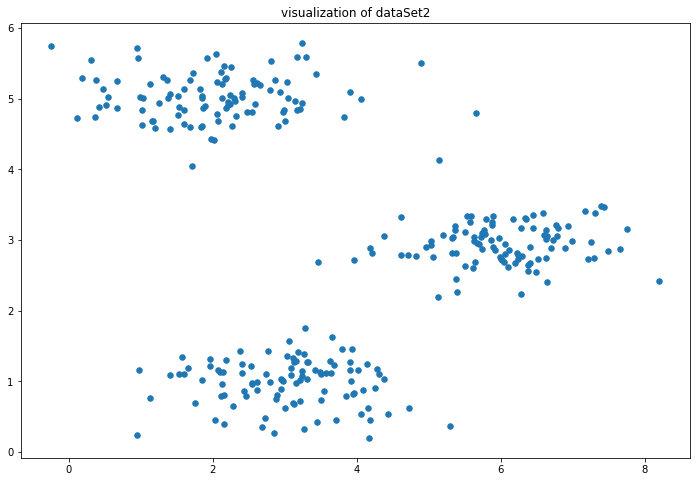

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X'][:,0], data['X'][:,1], s=30)
ax.set_title('visualization of dataSet2')
plt.show()

## Finding closest centroids

In [5]:
def findClosestCentroids(X, Centroids):
    size = X.shape[0]    # 数据集样本个数
    k = Centroids.shape[0]  # 聚簇个数
    output = np.zeros(size, dtype=np.int32)
    
    for i in range(size):
        idx = np.sum((X[i:i+1,:] - Centroids) ** 2, axis=1).argmin()
        output[i] = idx
    return output   

In [6]:
def computeCentroids(X, labels, k):
    '''
    labels存储每一样本所属聚簇类
    '''
    Centroids = np.zeros((k,X.shape[1]), dtype=np.float64)
    for i in range(k):
        Centroids[i,:] = X[np.where(labels == i)].mean(axis=0)  # 得到第i聚簇类的平均值
    return Centroids

指定初始k个聚簇中心，此处k=3，且选取第0，1，2个数据点

In [7]:
X = data['X']
X.shape, type(X)

((300, 2), numpy.ndarray)

In [8]:
initialCentroids = X[:3,:]
initialCentroids

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ]])

尝试50次迭代过程，绘制出每一次迭代后的图像

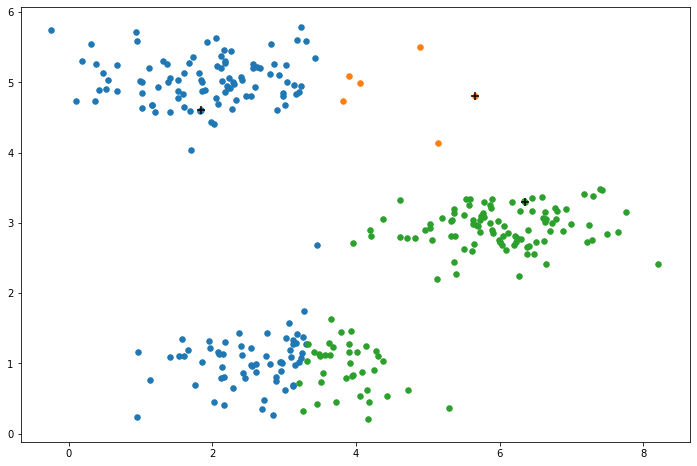

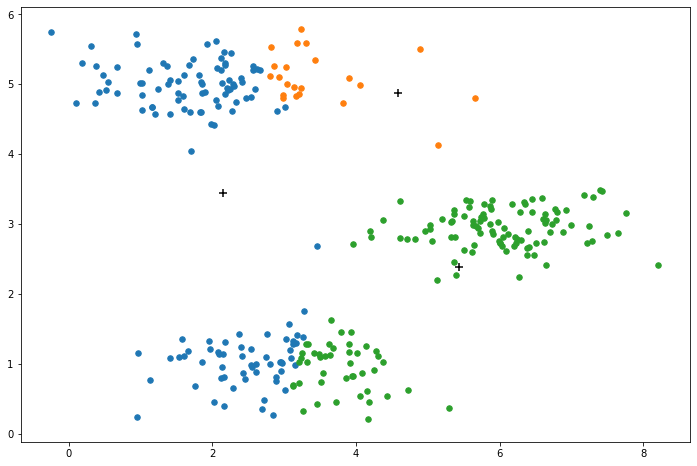

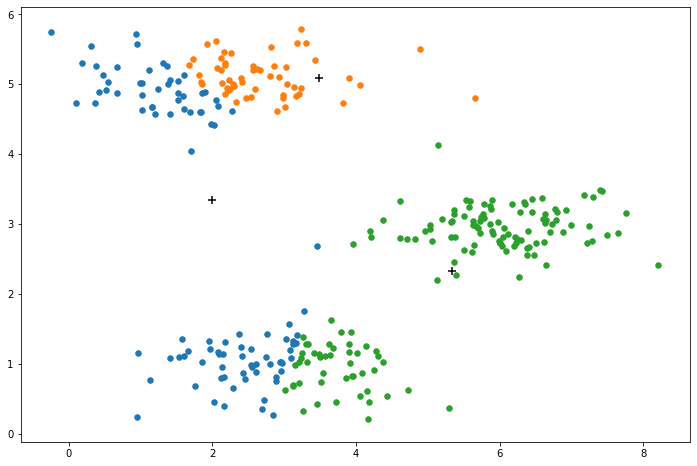

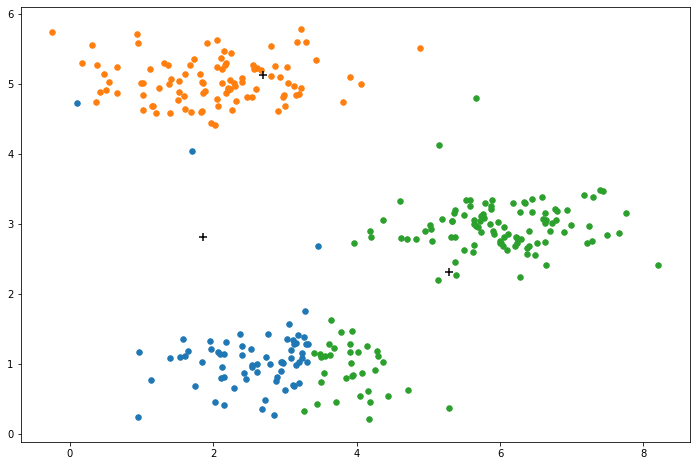

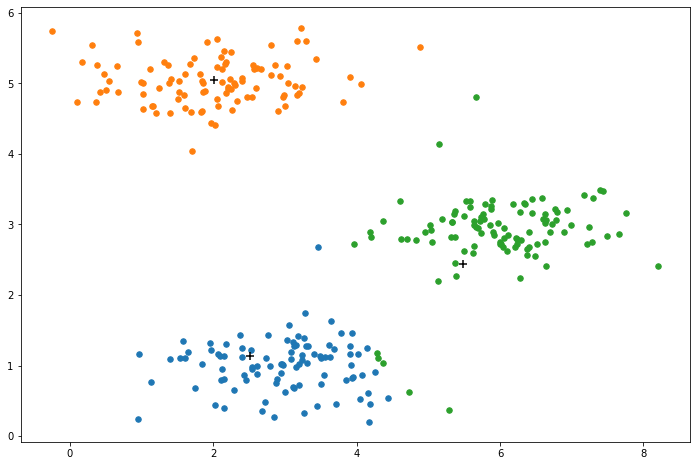

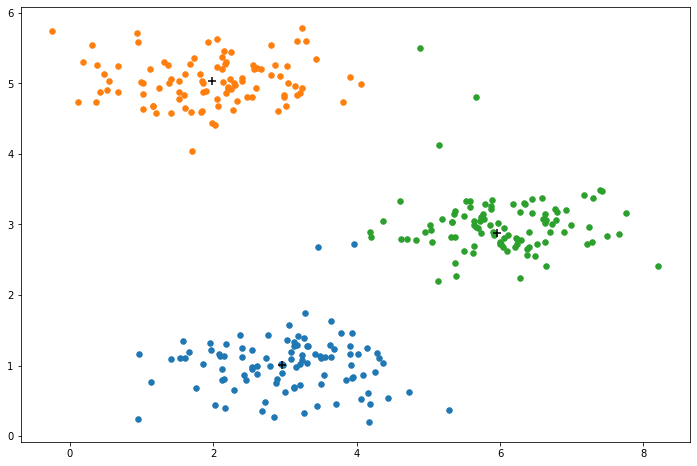

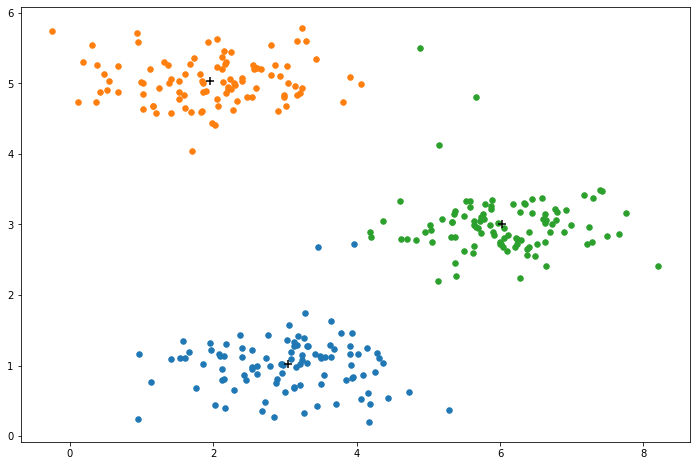

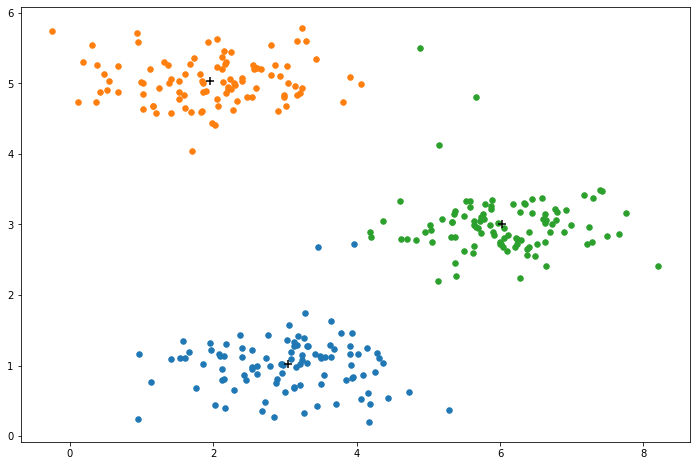

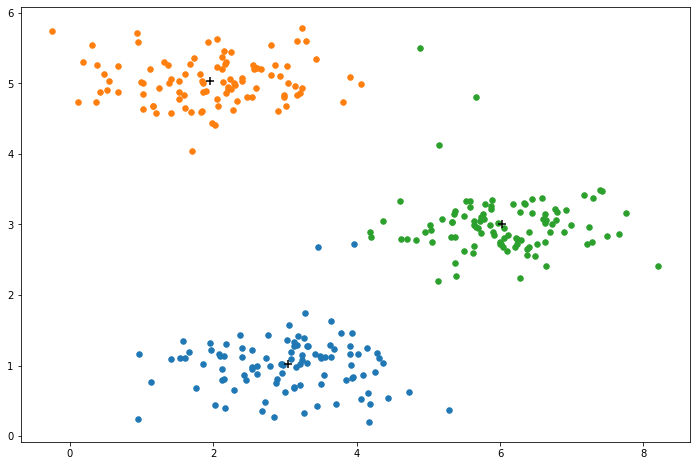

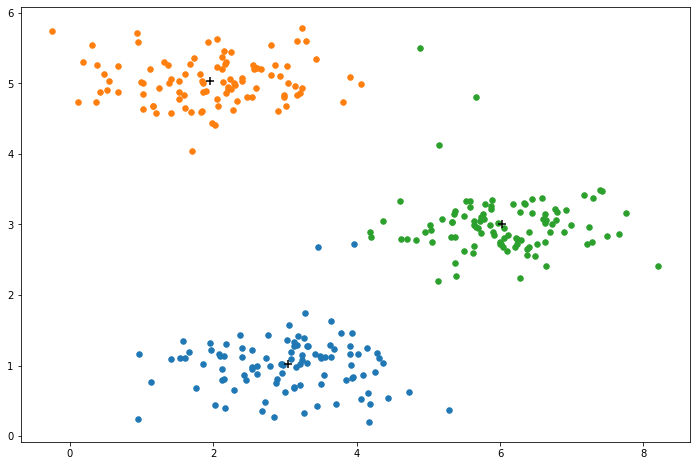

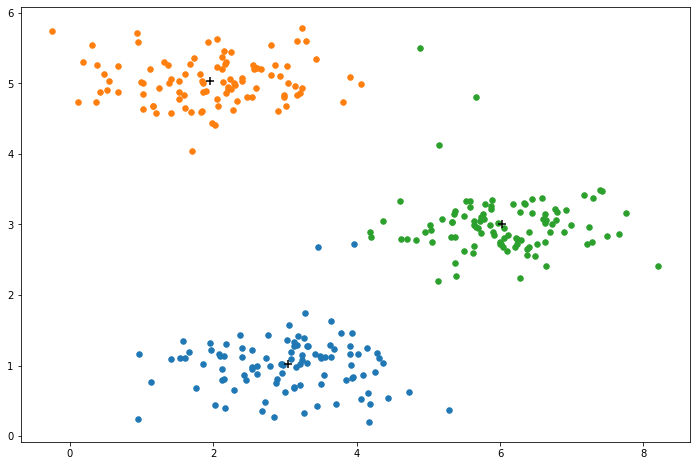

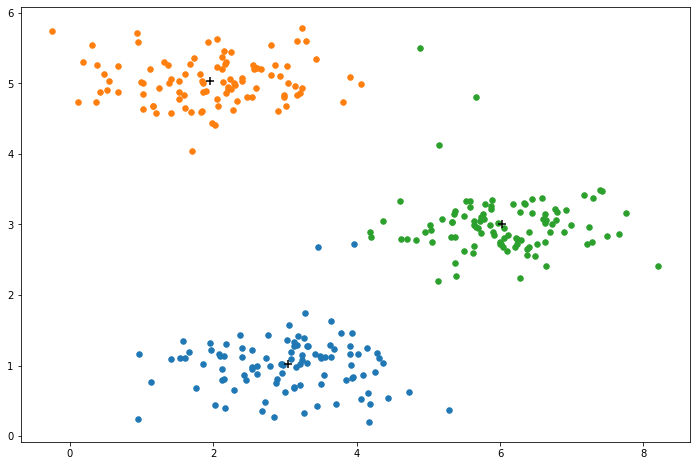

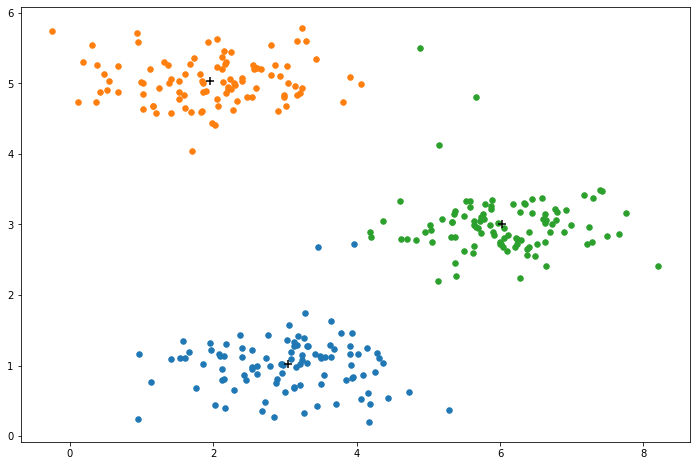

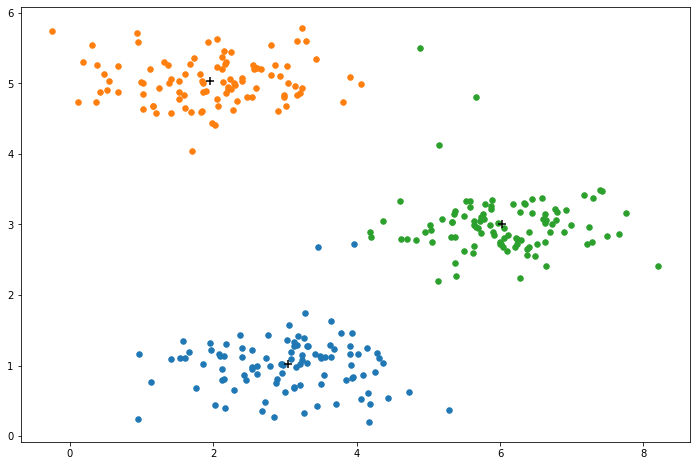

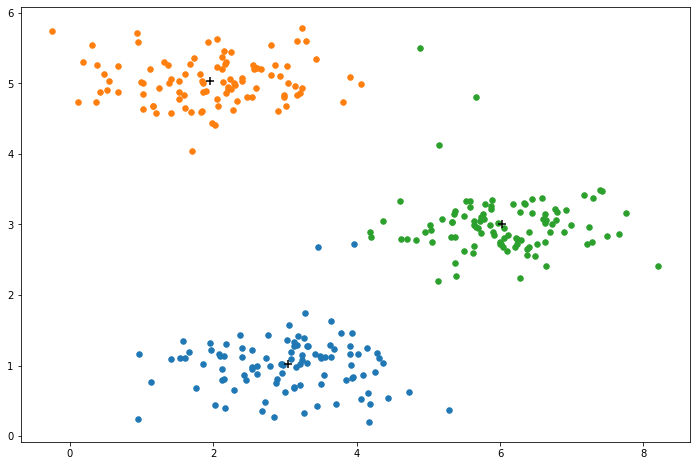

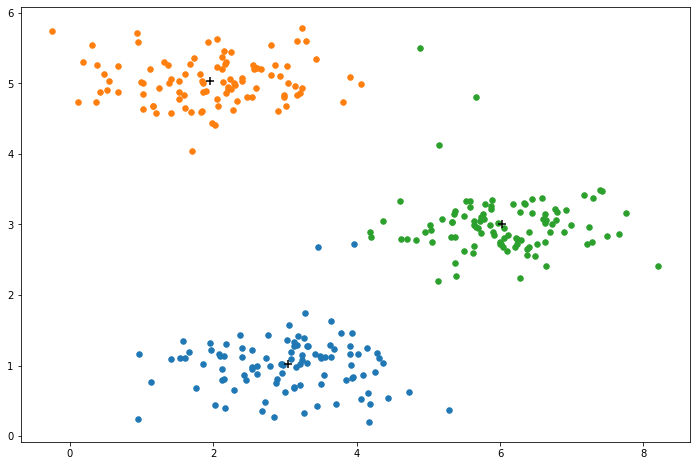

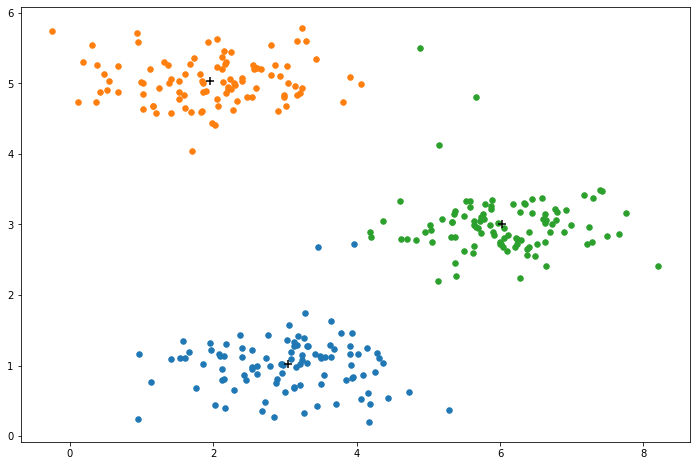

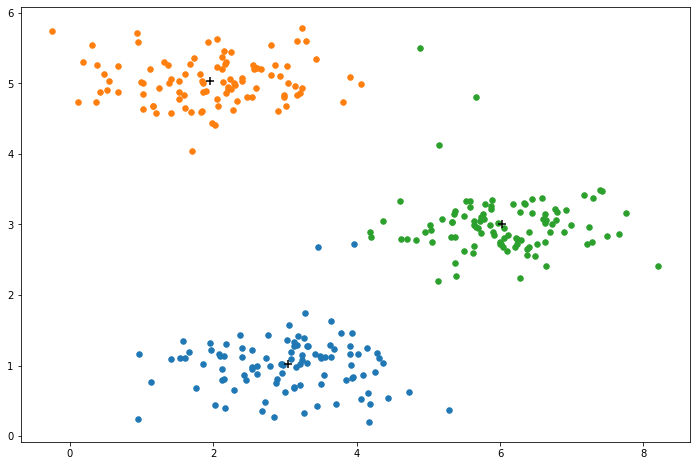

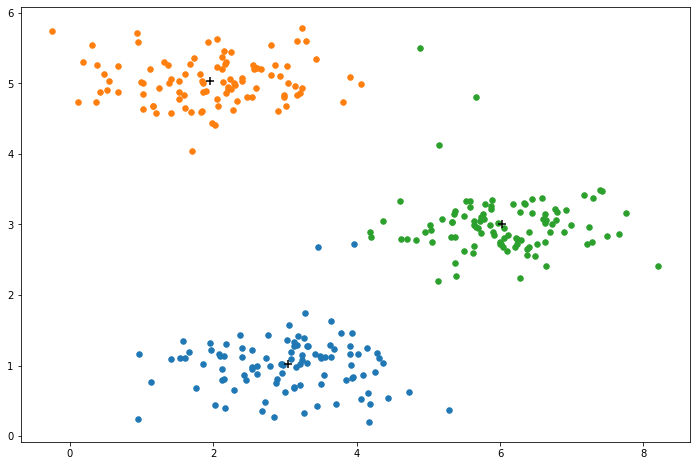

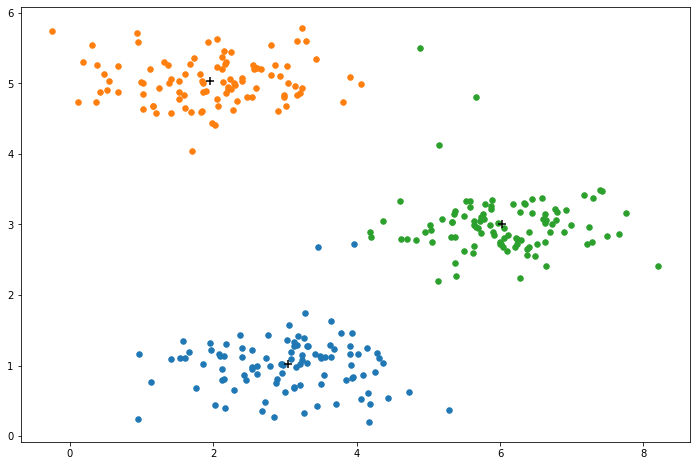

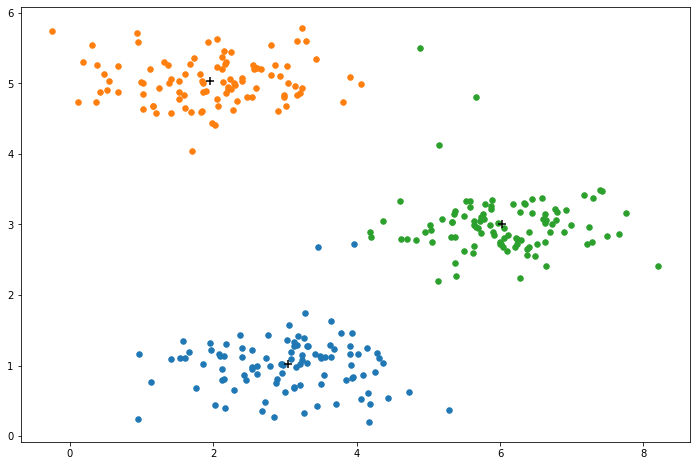

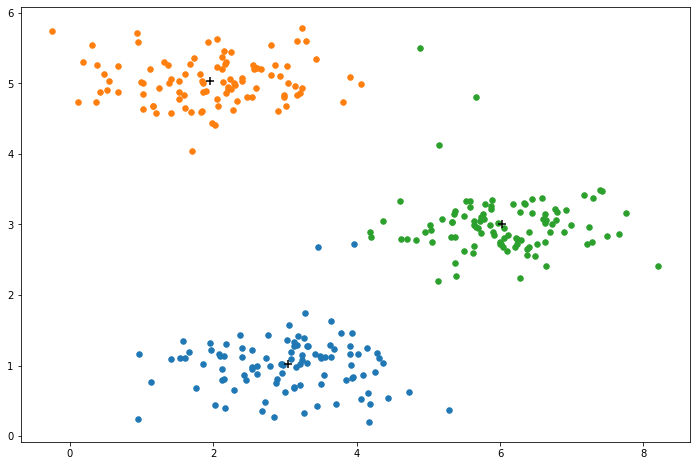

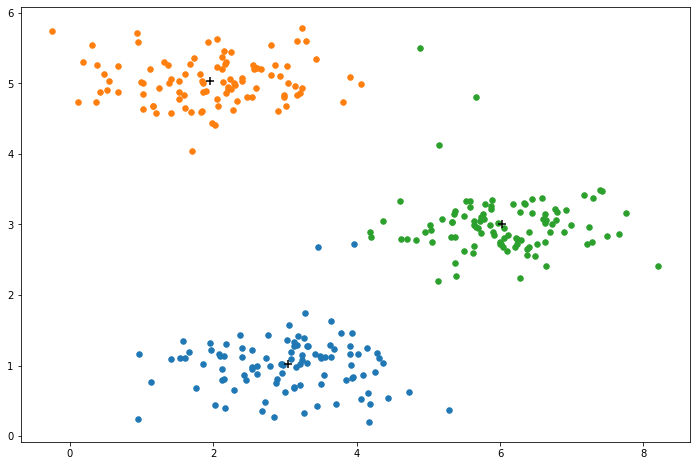

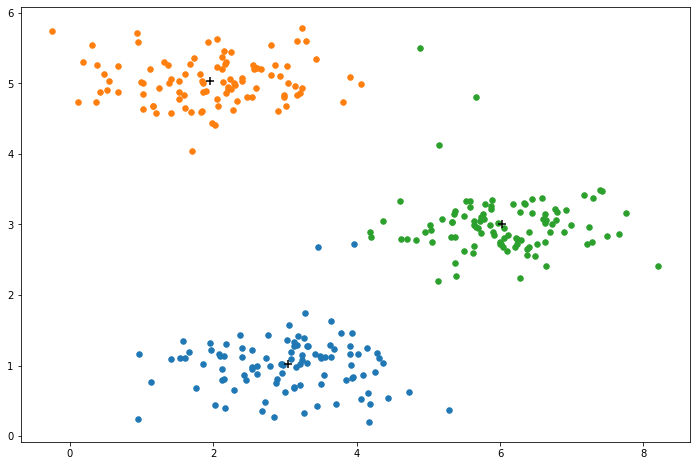

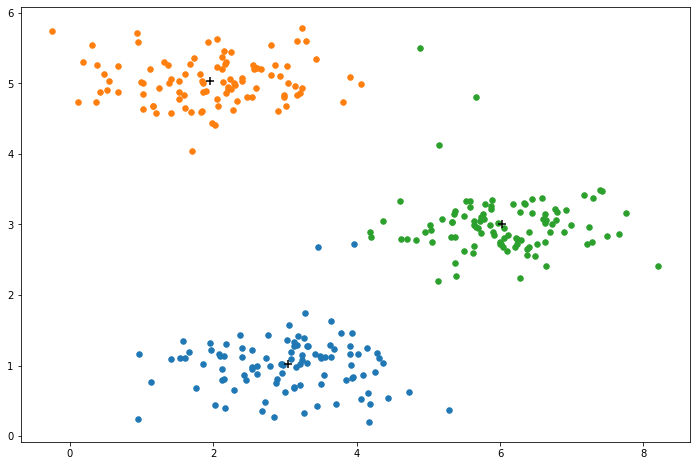

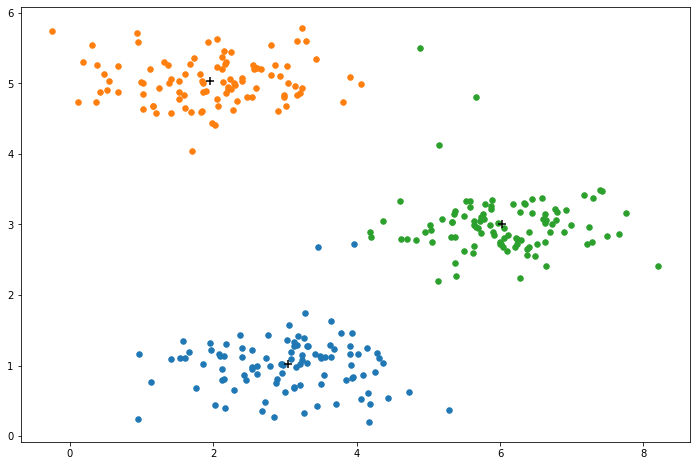

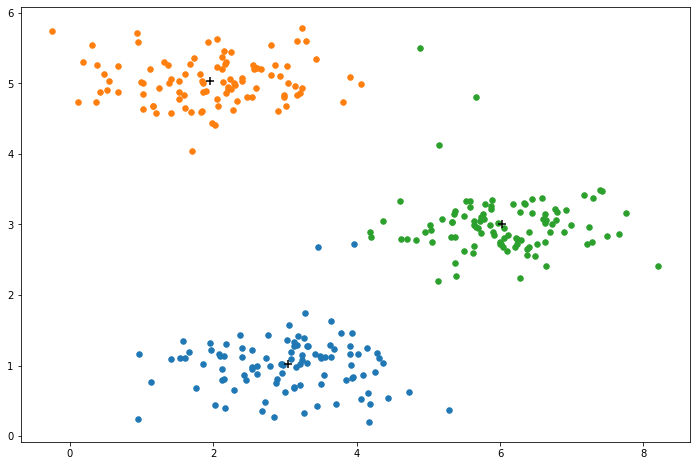

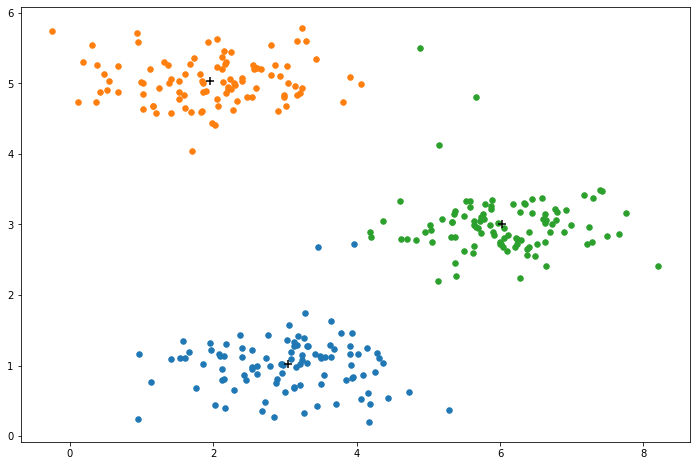

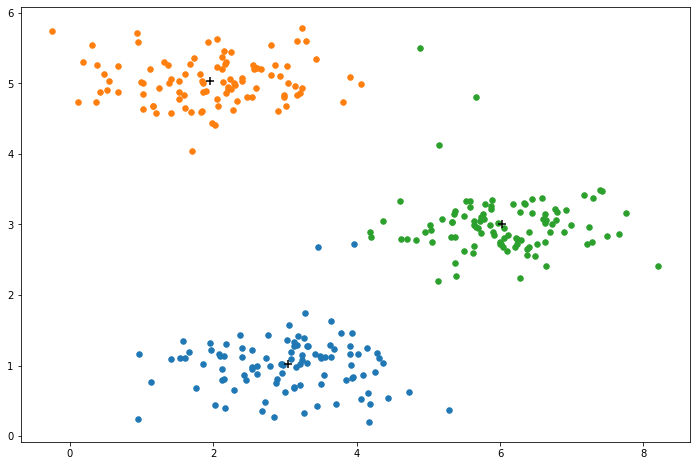

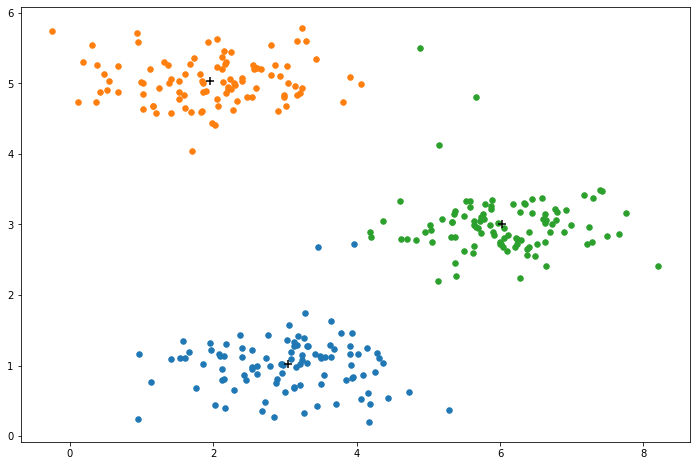

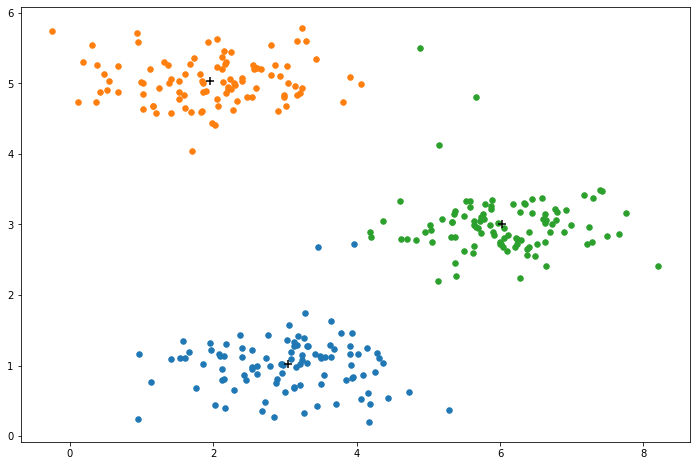

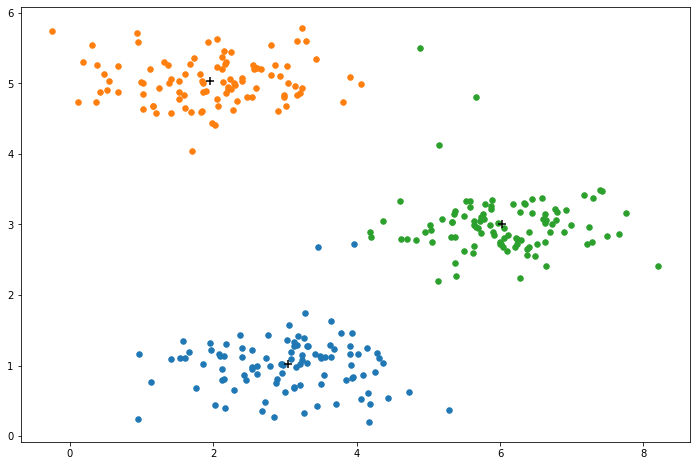

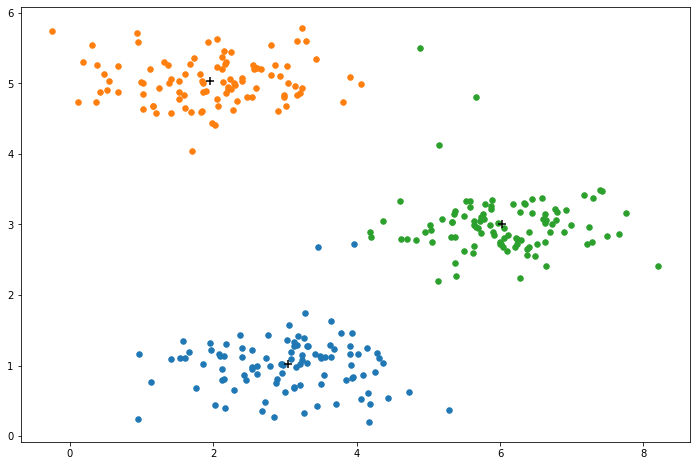

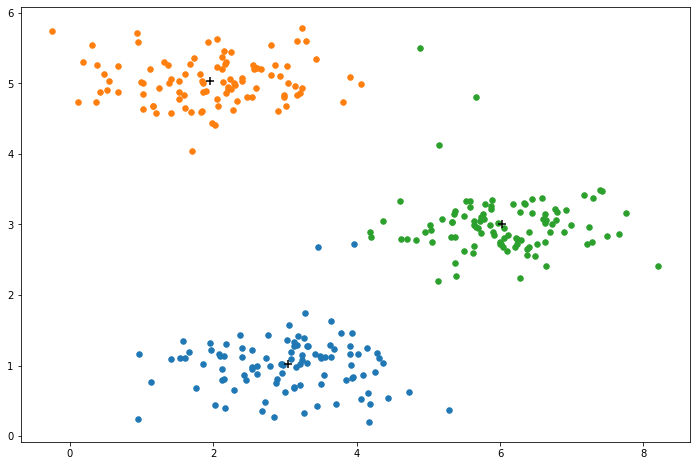

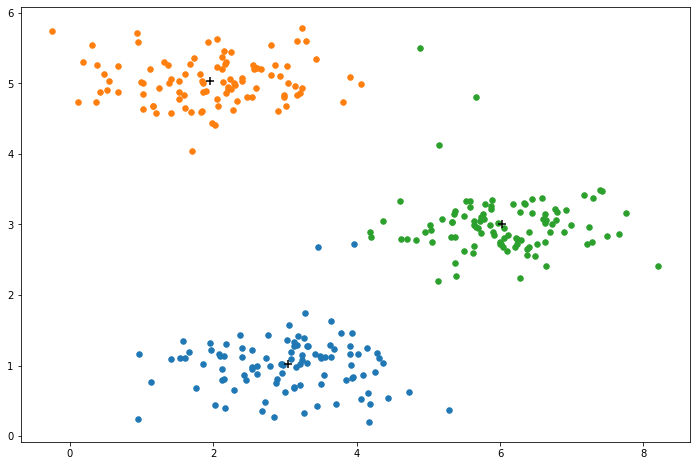

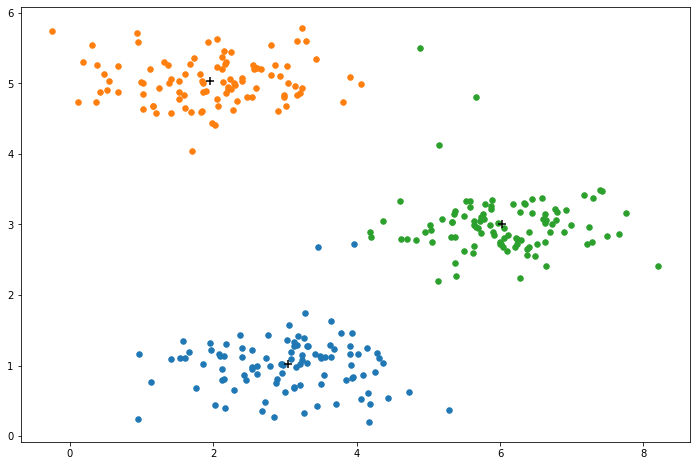

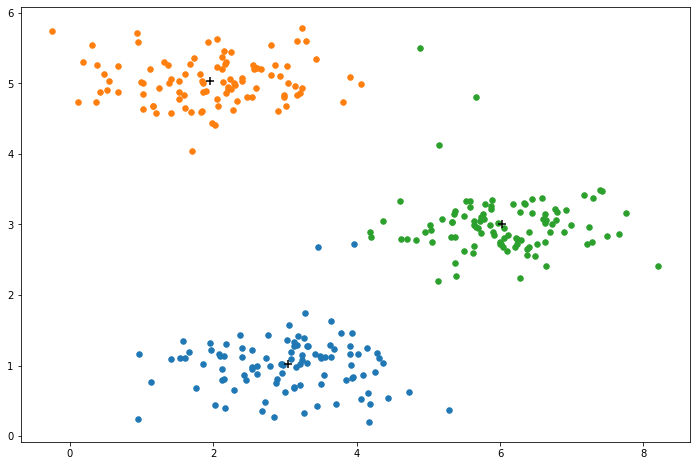

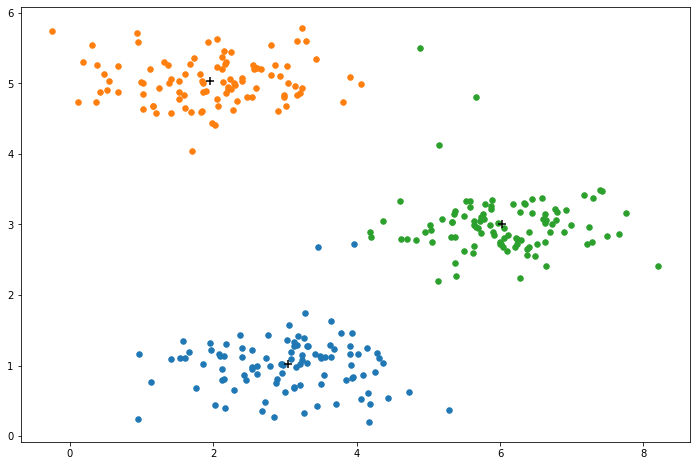

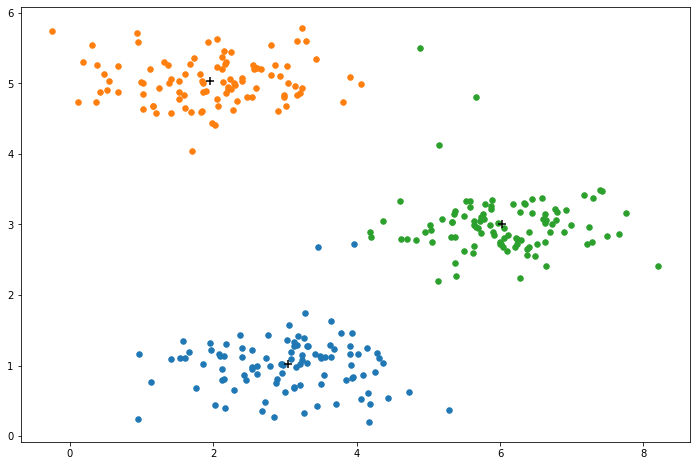

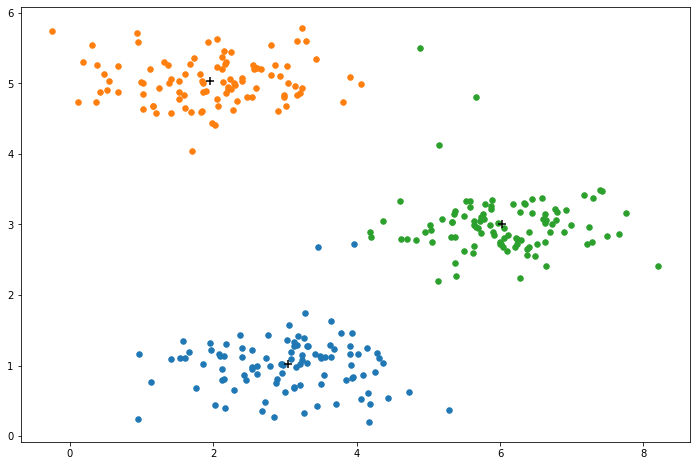

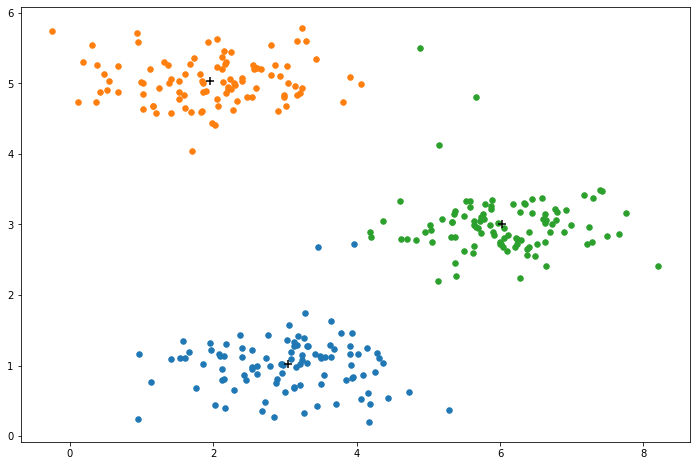

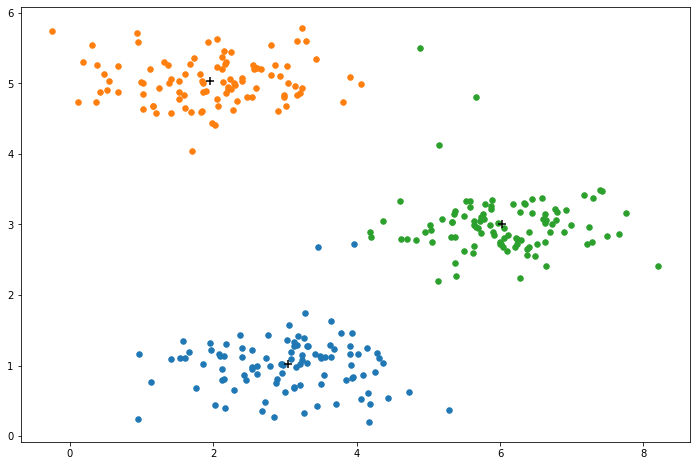

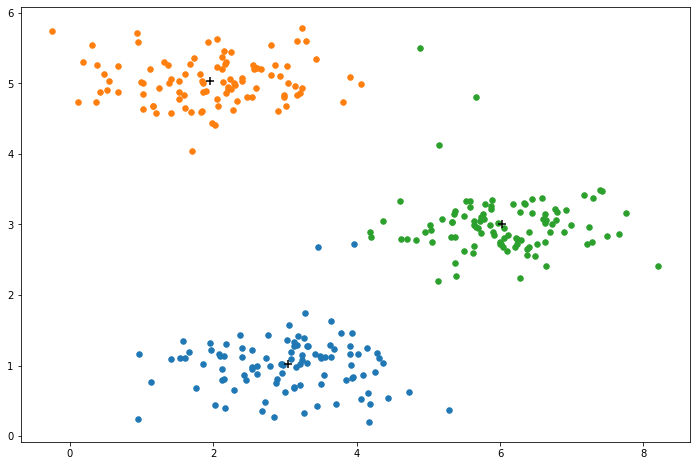

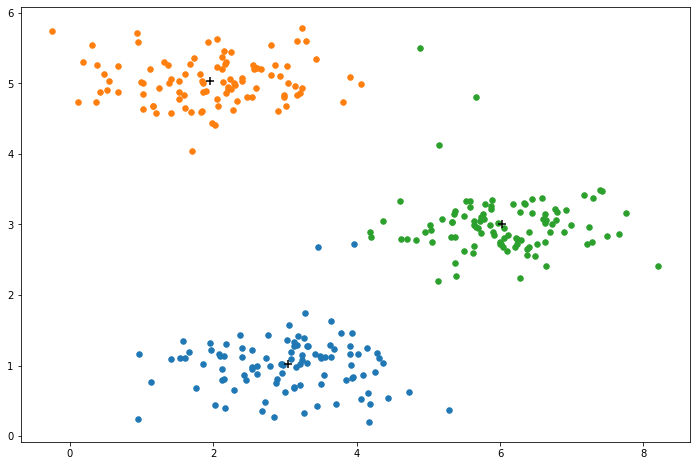

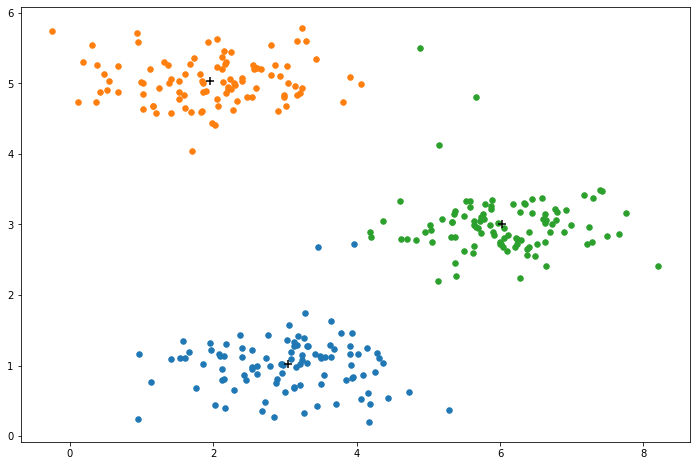

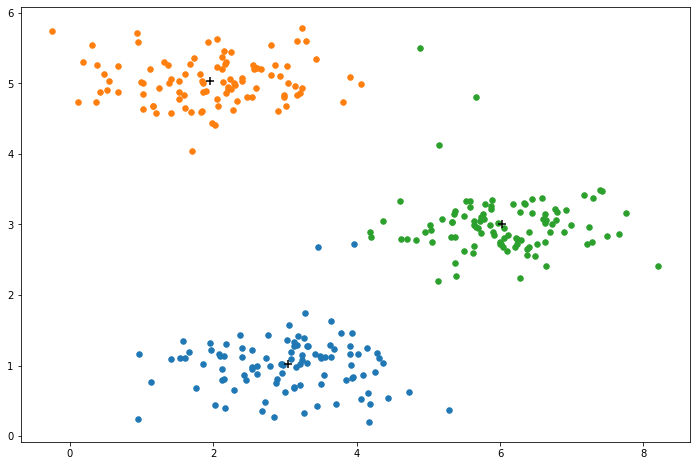

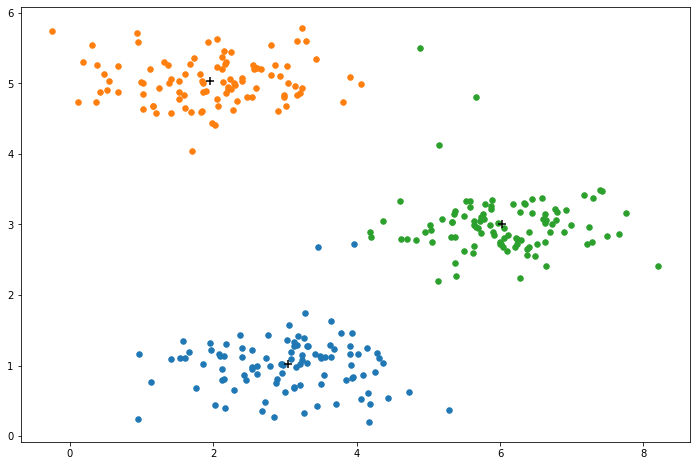

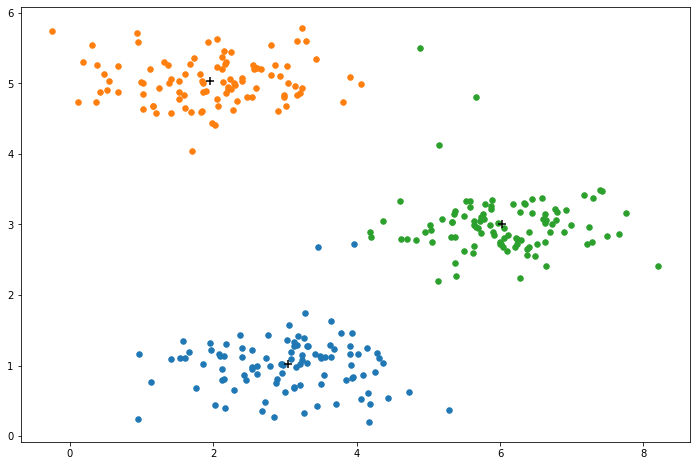

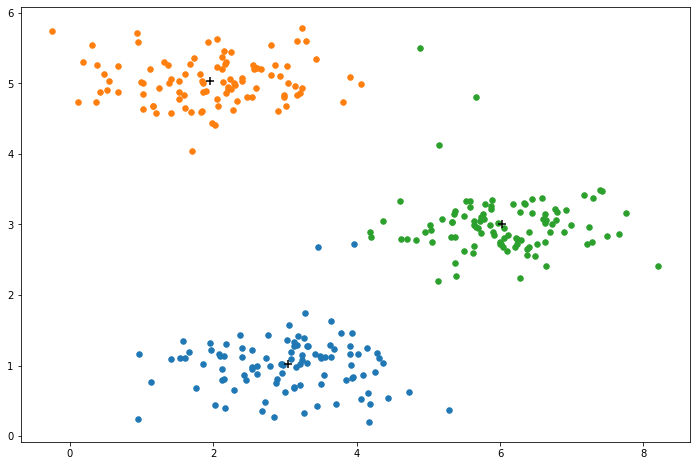

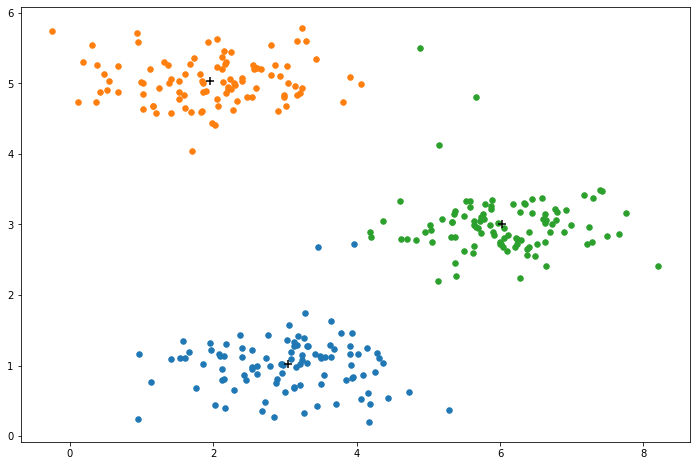

In [9]:
import time

iters = 50
k = 3
Centroids = initialCentroids

for i in range(iters):
    
    
    # Cluster assignment
    labels = findClosestCentroids(X, Centroids)
    # after get the labels, we already know where the data points are allocated
    fig, ax = plt.subplots(figsize=(12, 8))
    for j in range(k):
        ax.scatter(X[np.where(labels == j)][:,0],X[np.where(labels == j)][:,1],s=30)
    ax.scatter(Centroids[:,0],Centroids[:,1],s=80,marker='+',c='k')
    plt.show()
    # Modify Centroids
    Centroids = computeCentroids(X, labels, k)
    time.sleep(1)

通过以上图片观察到效果还算不错

下面采取随机选取初始簇心的方式实现K-means算法

In [10]:
def kMeansInitCentroids(X, k):
    '''
    Initialize the centroids to be random examples
    '''
    randomList = np.random.choice([i for i in range(X.shape[0])], k, replace=False)
    return X[randomList]

[[6.88575584 2.88845269]
 [3.23197916 4.93989405]
 [3.06192918 1.5719211 ]]


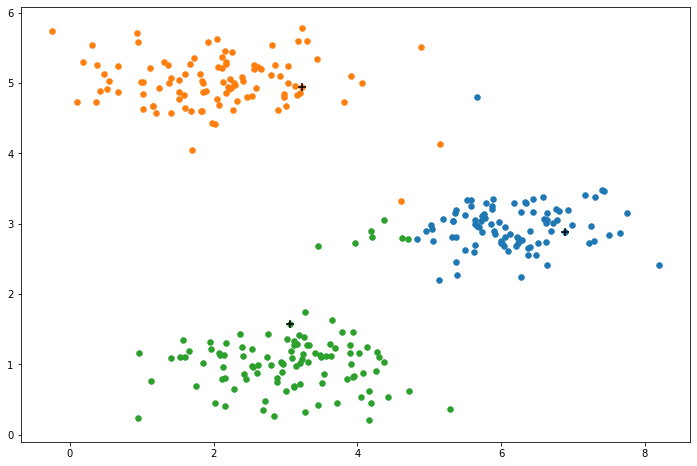

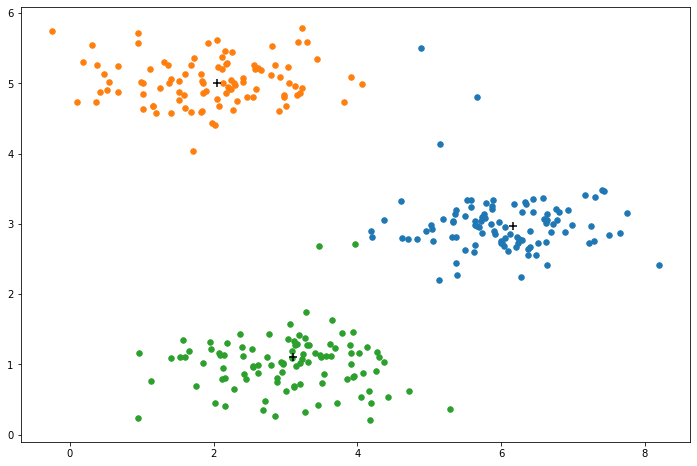

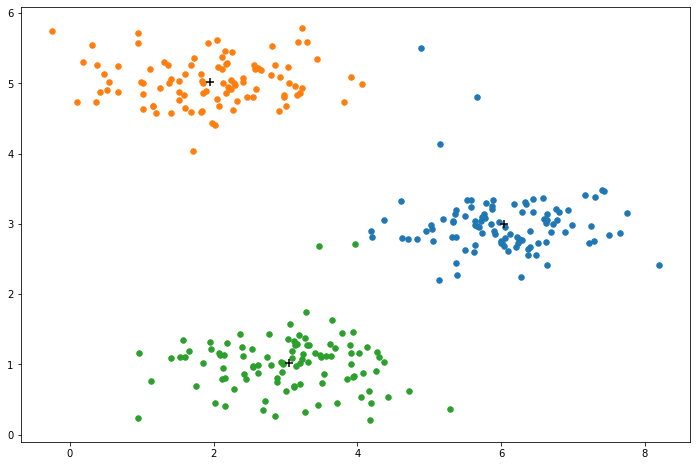

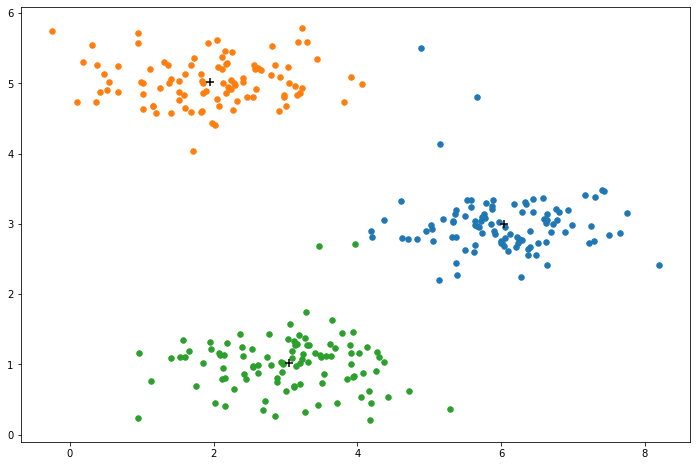

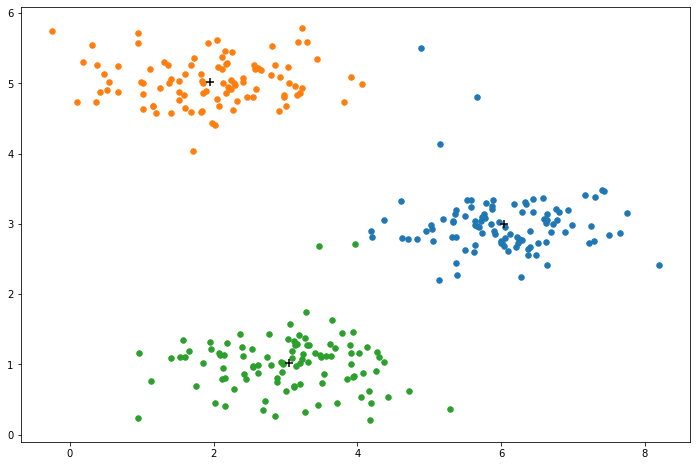

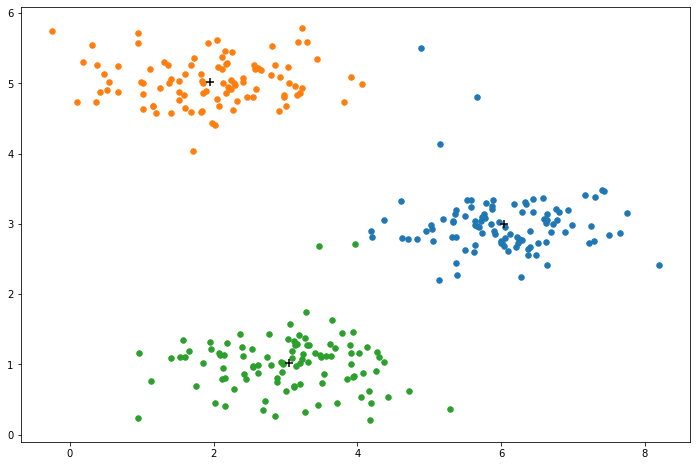

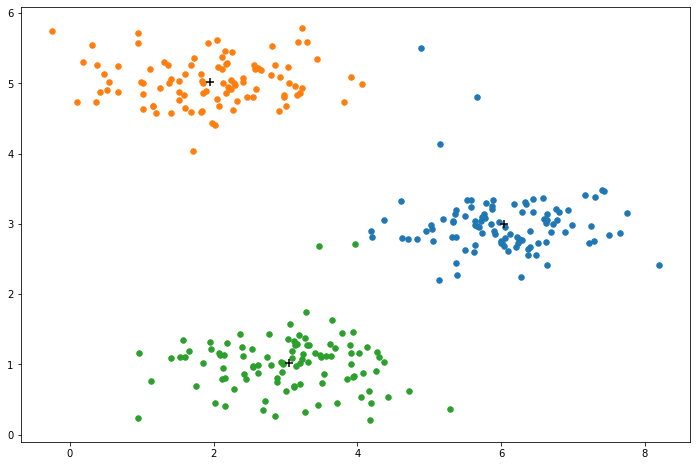

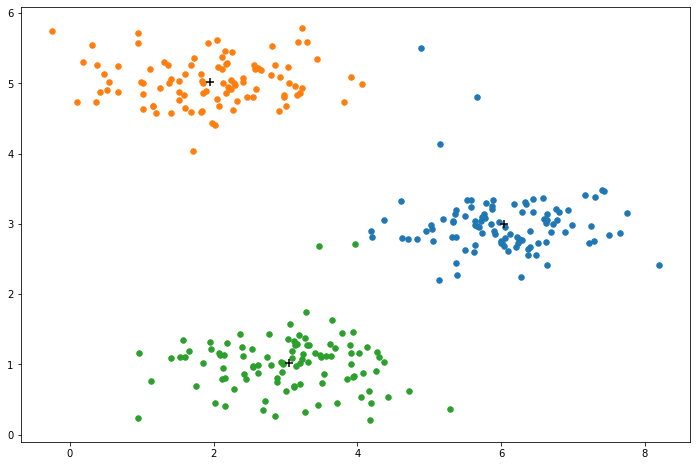

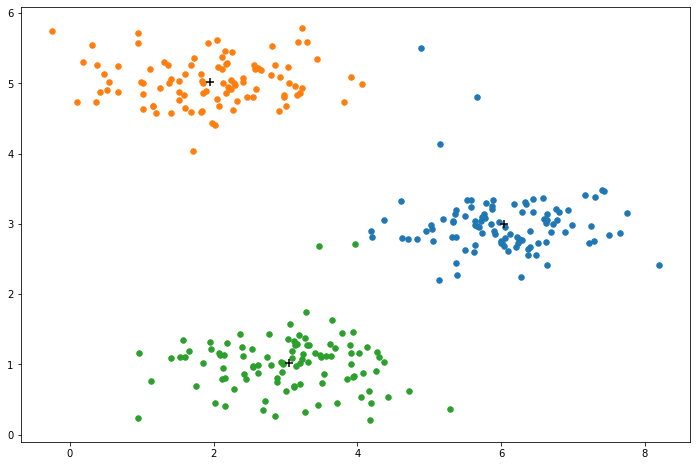

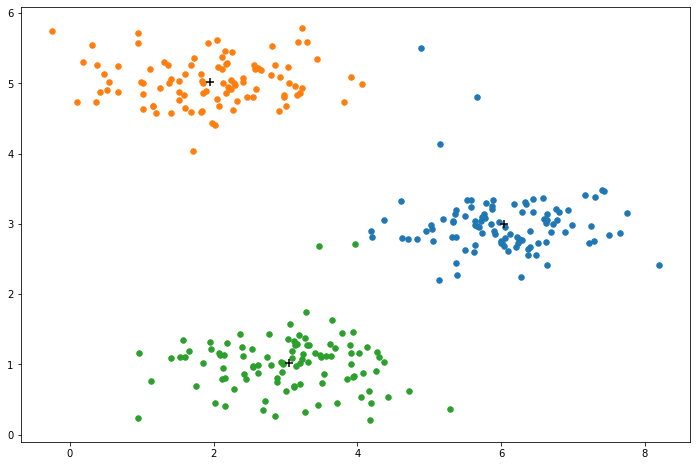

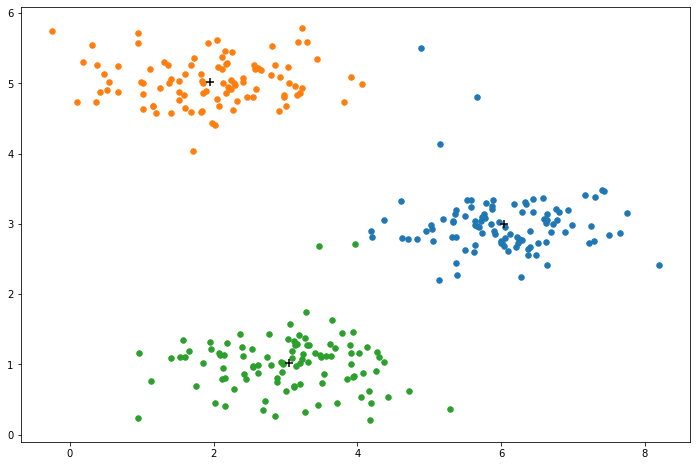

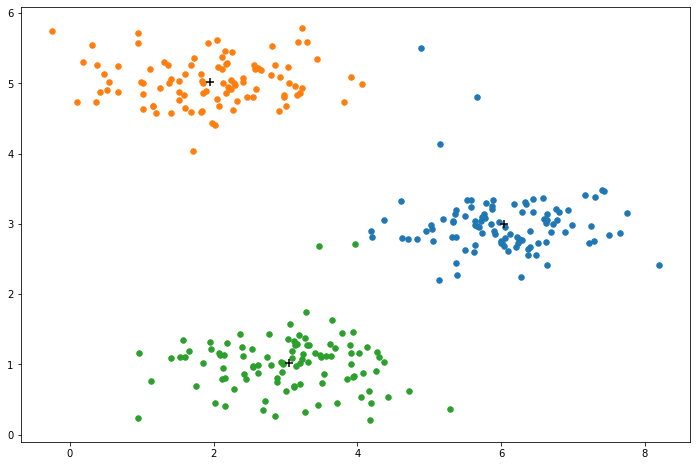

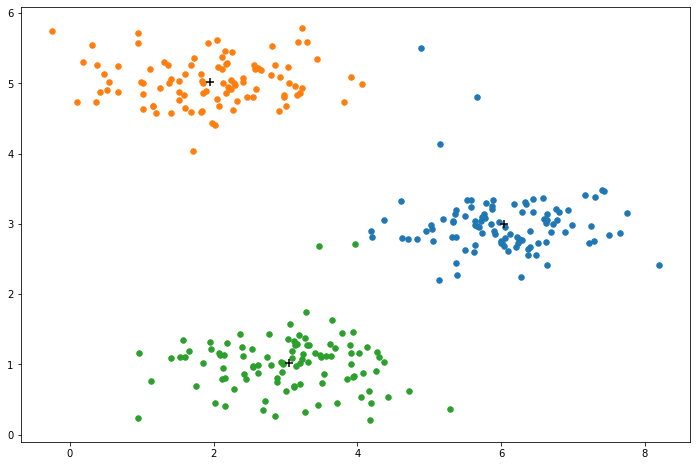

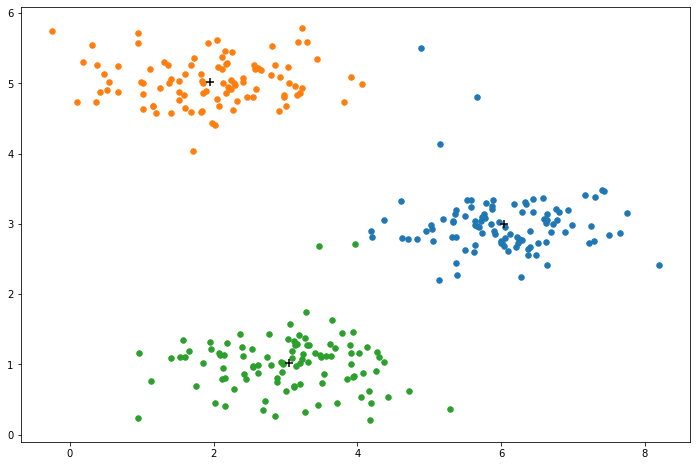

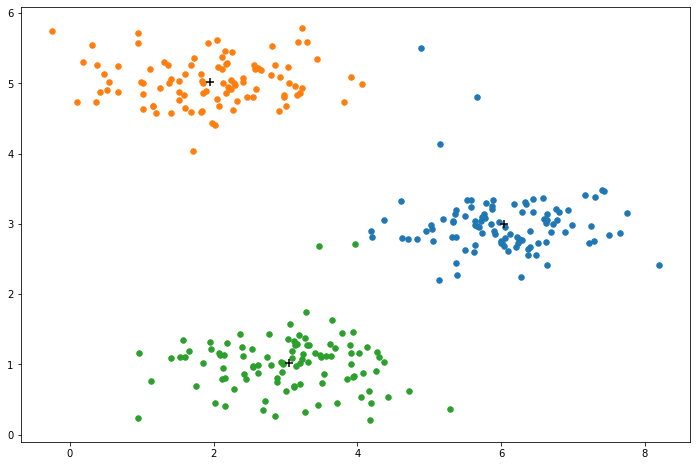

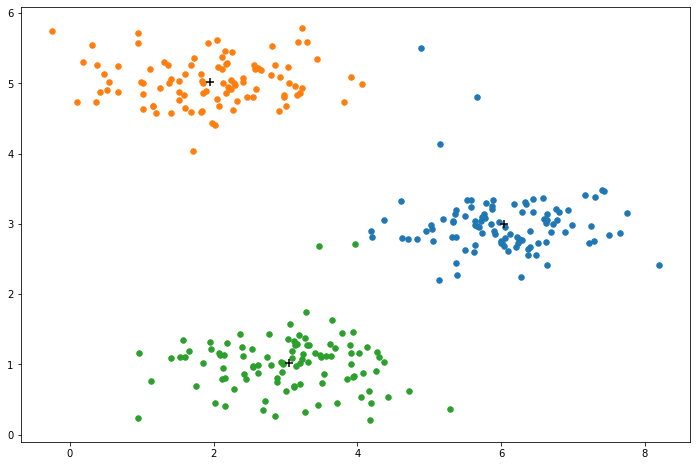

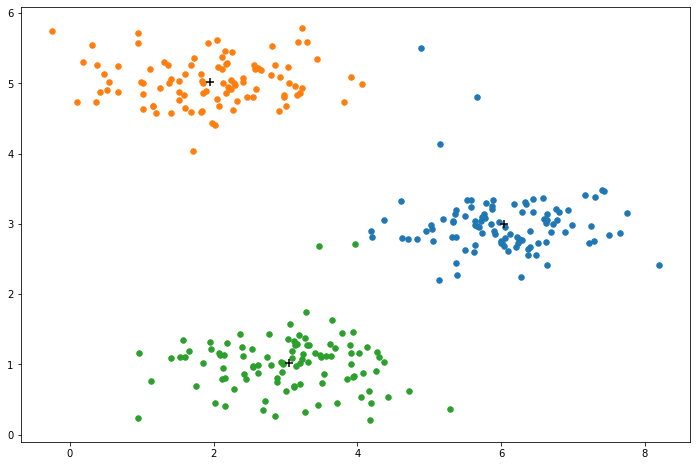

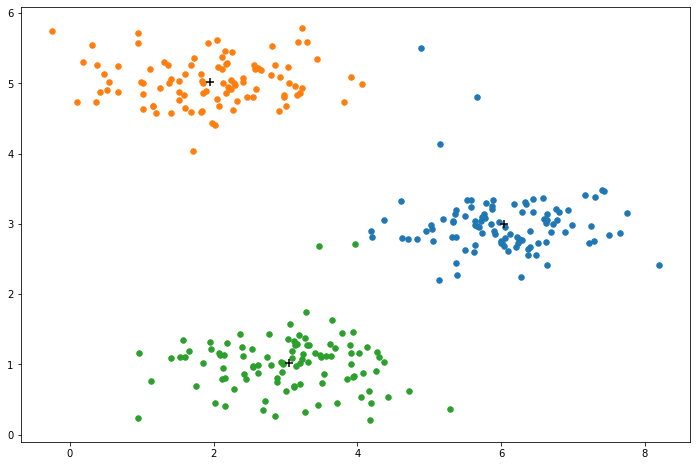

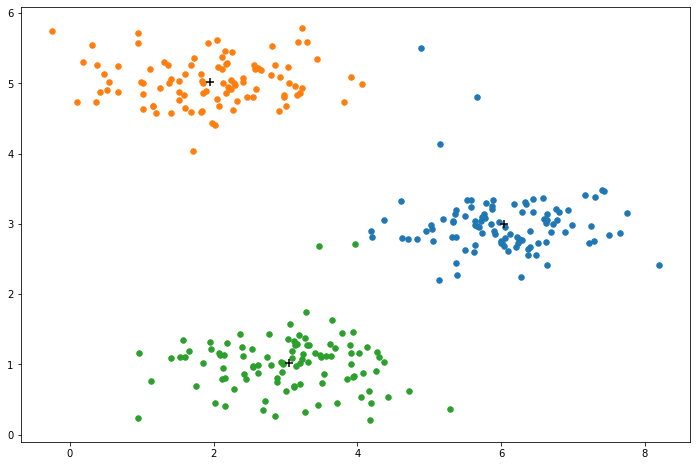

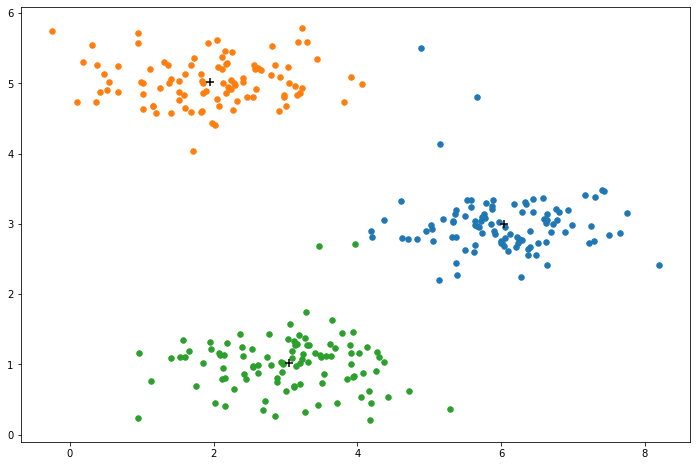

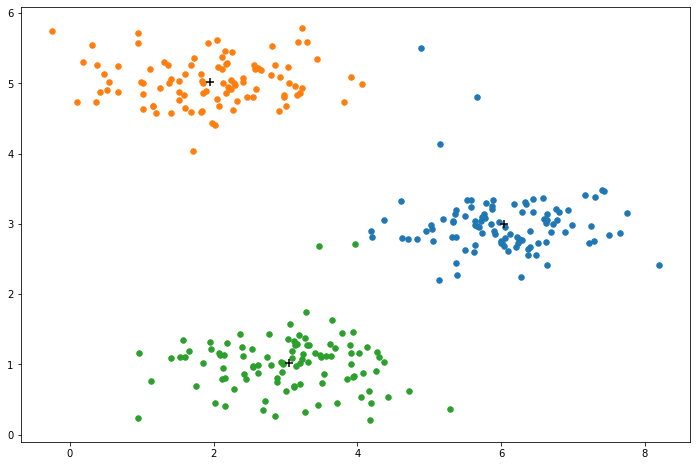

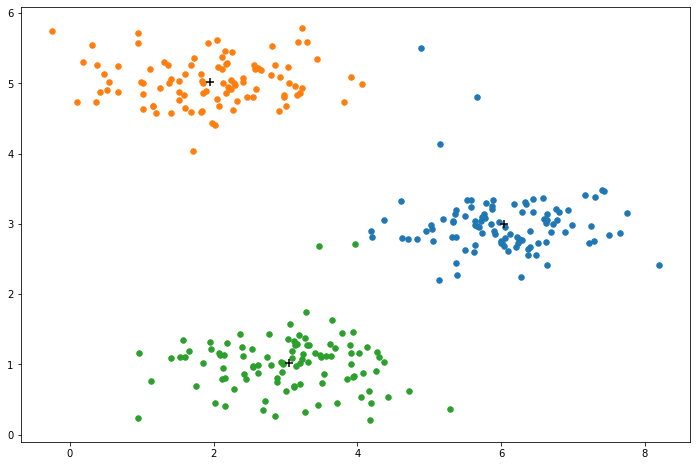

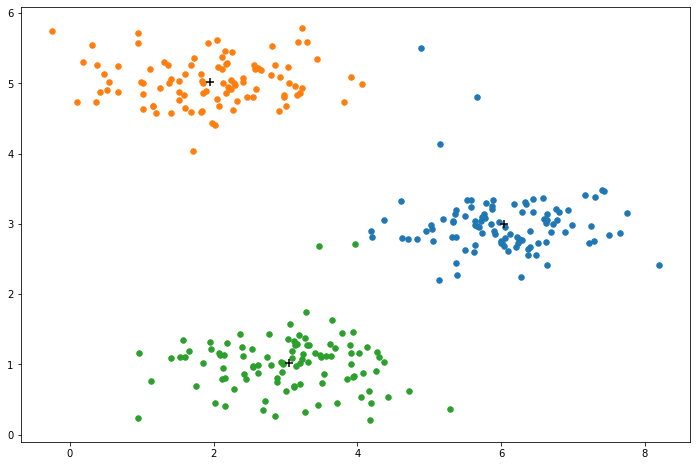

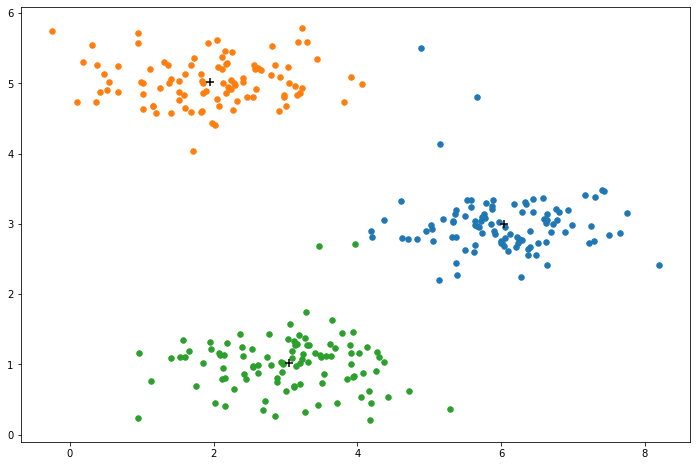

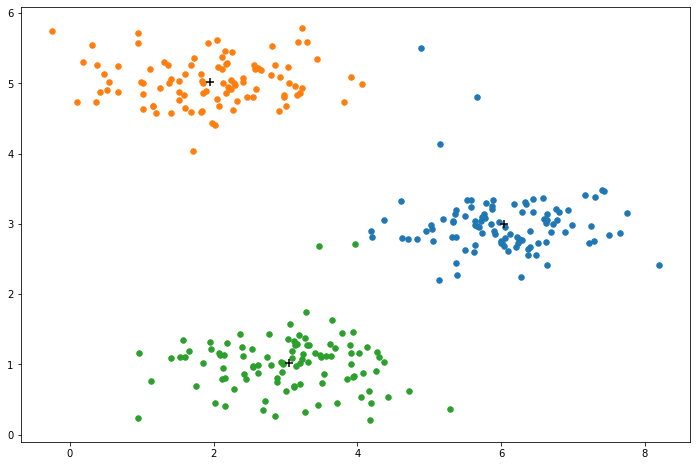

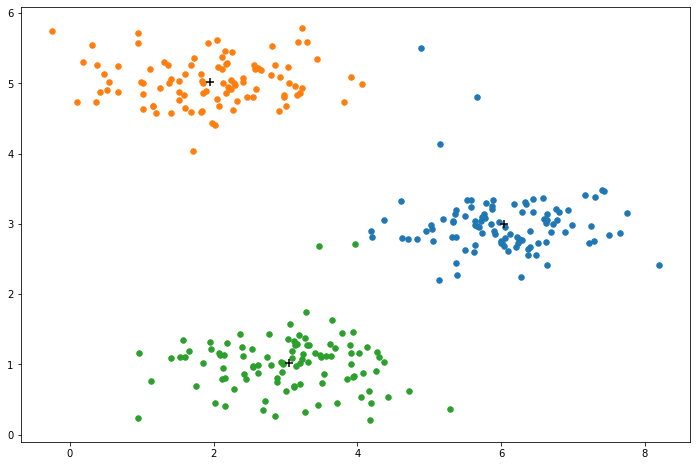

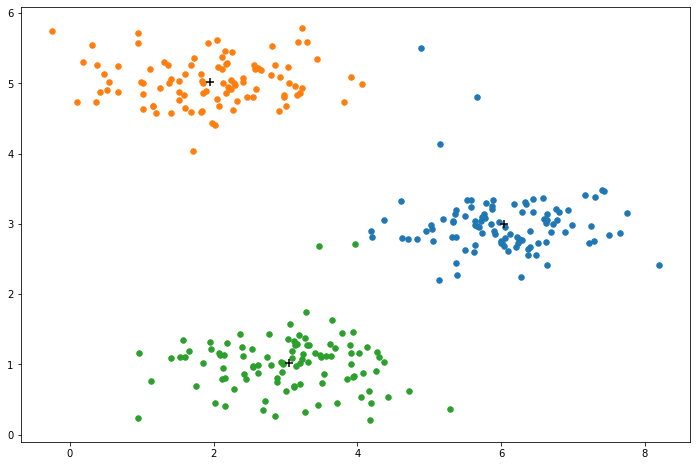

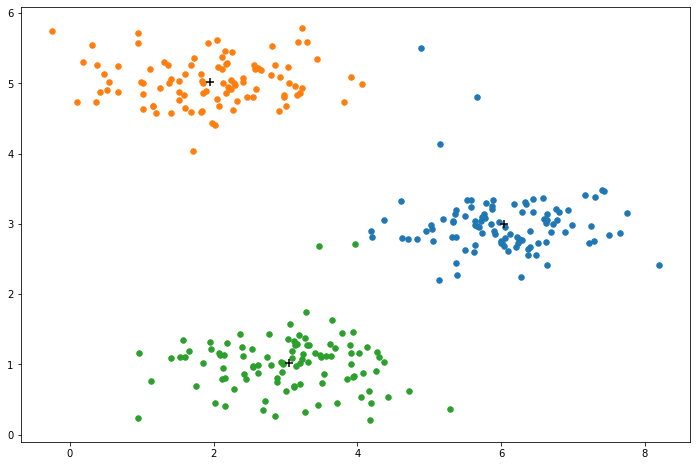

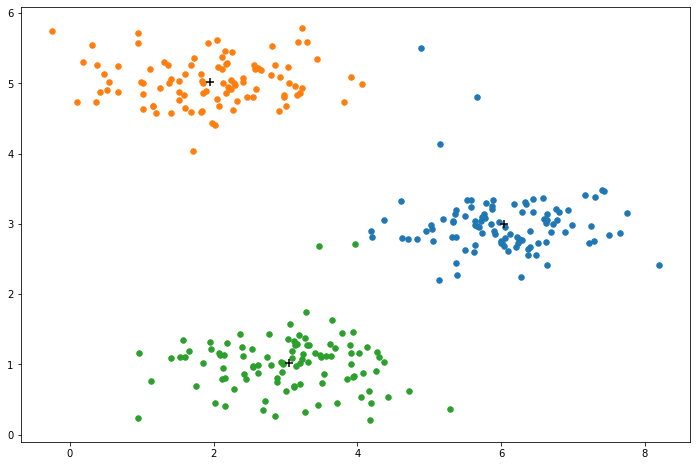

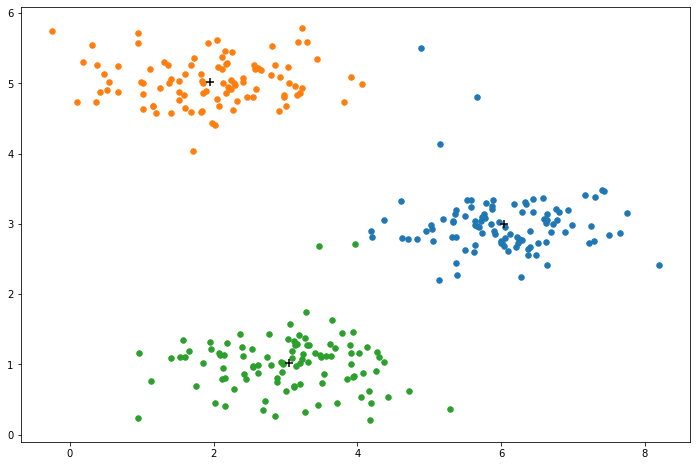

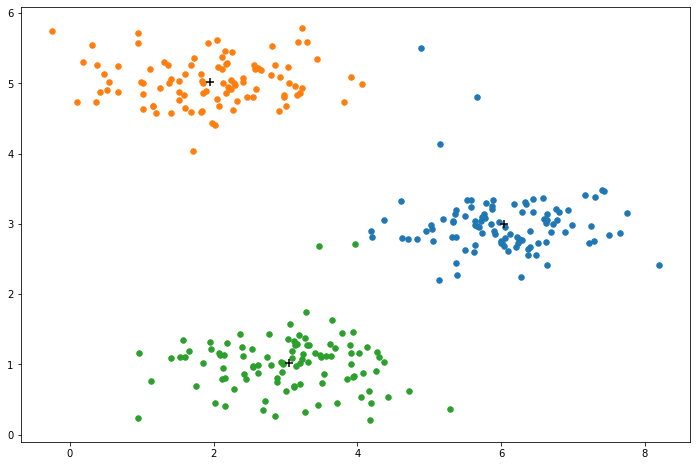

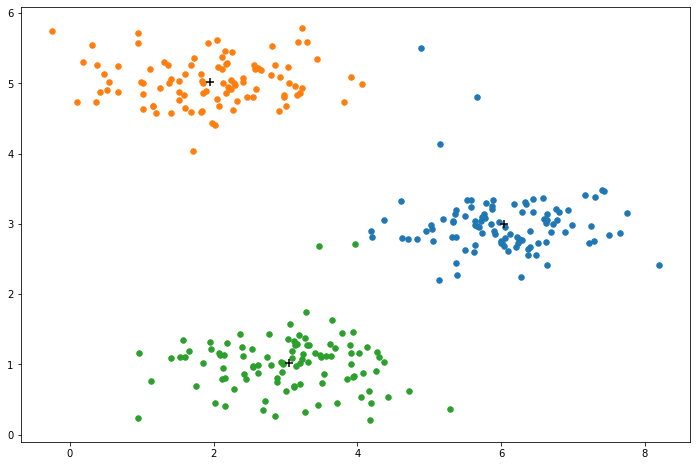

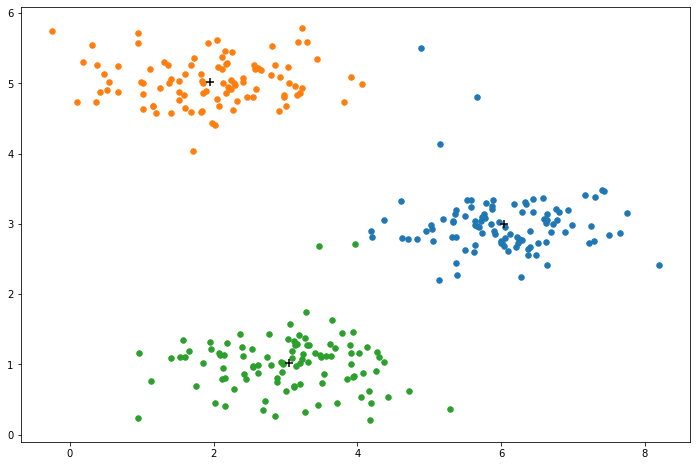

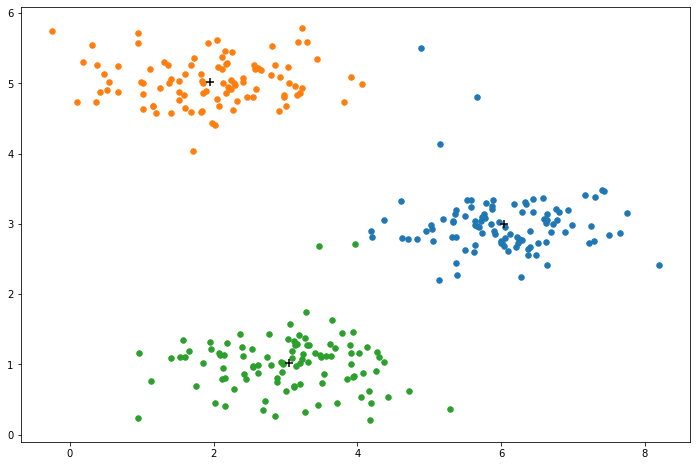

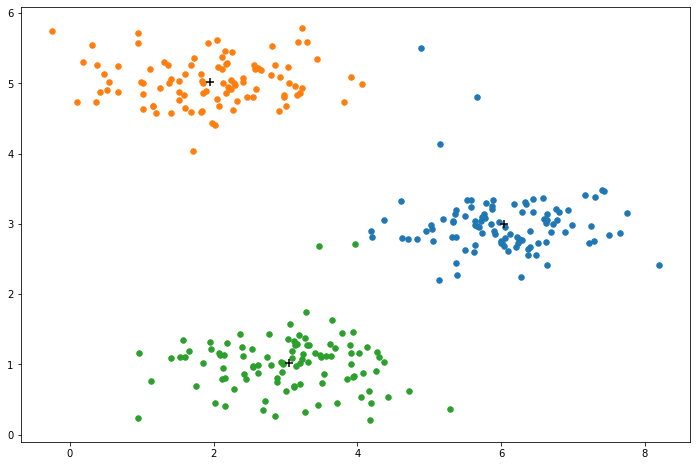

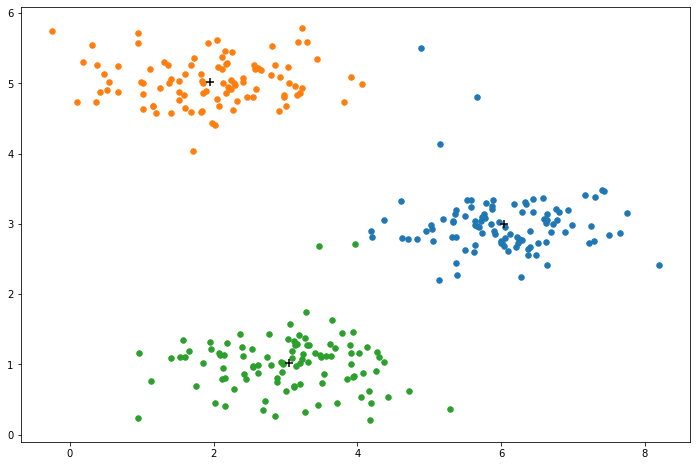

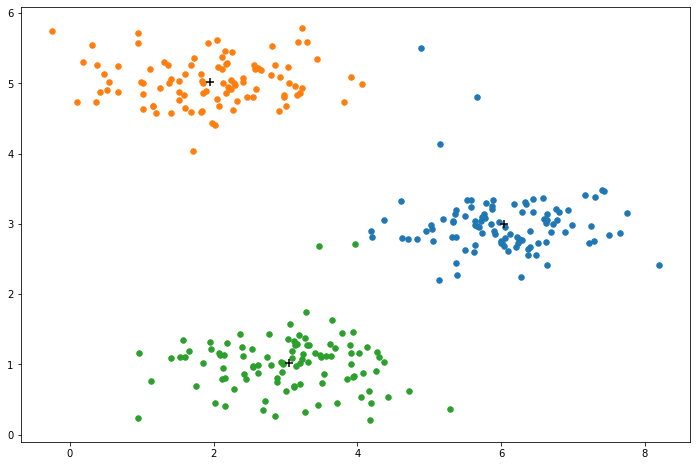

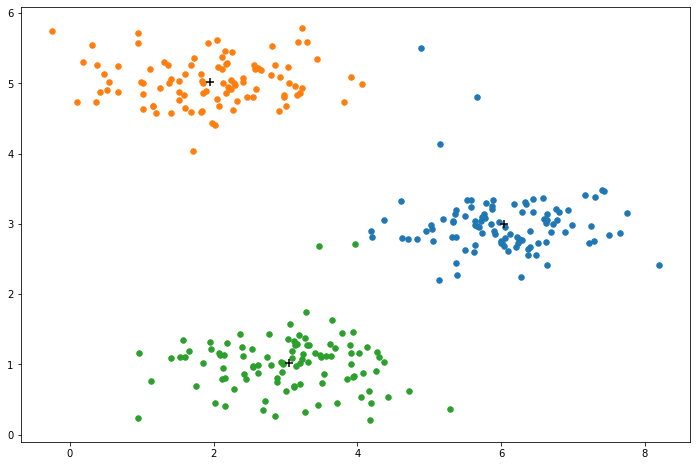

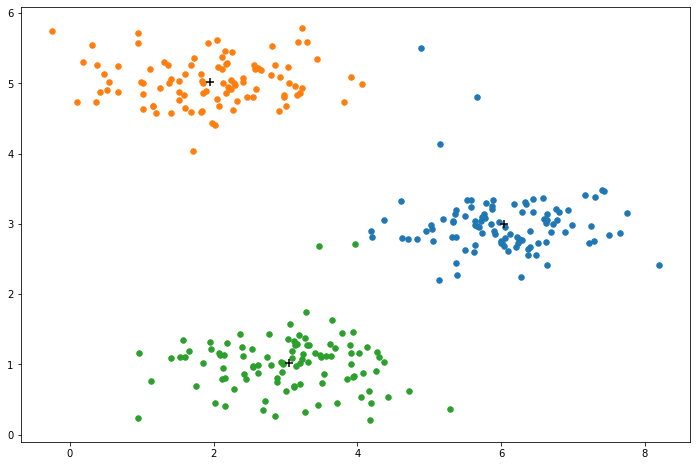

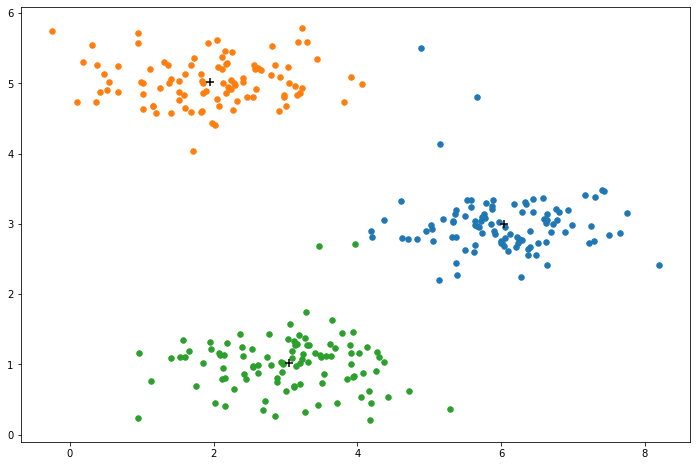

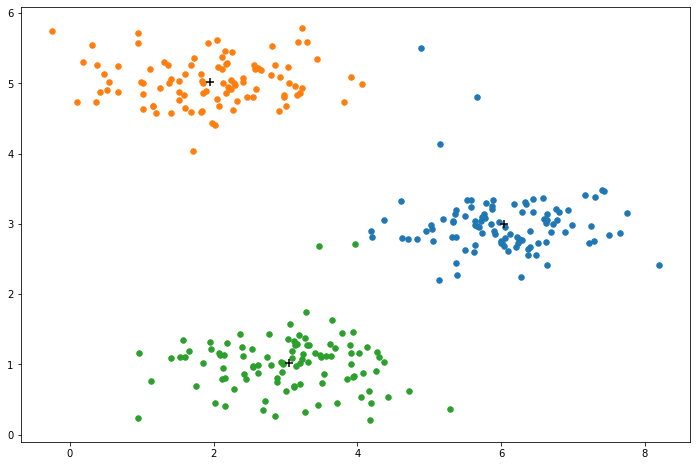

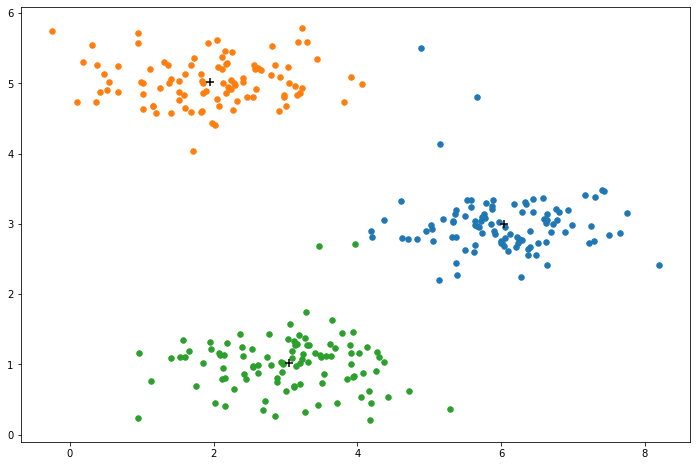

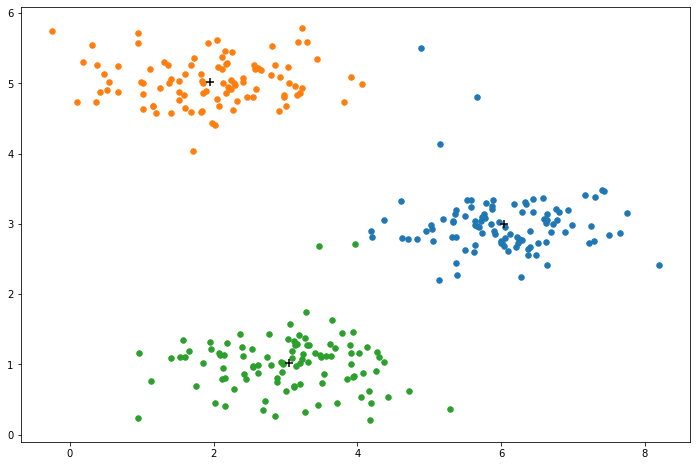

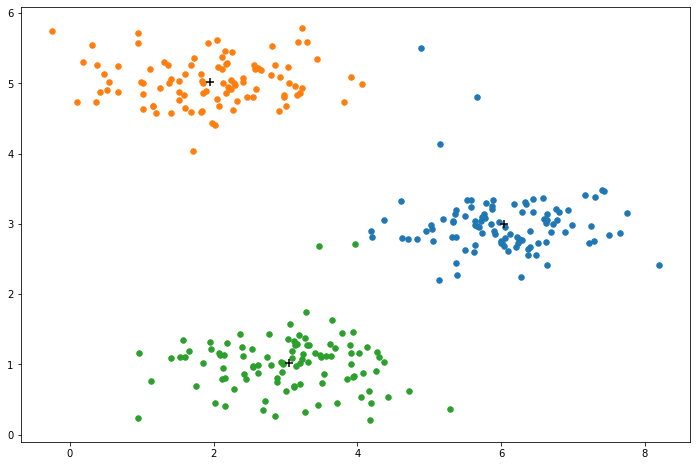

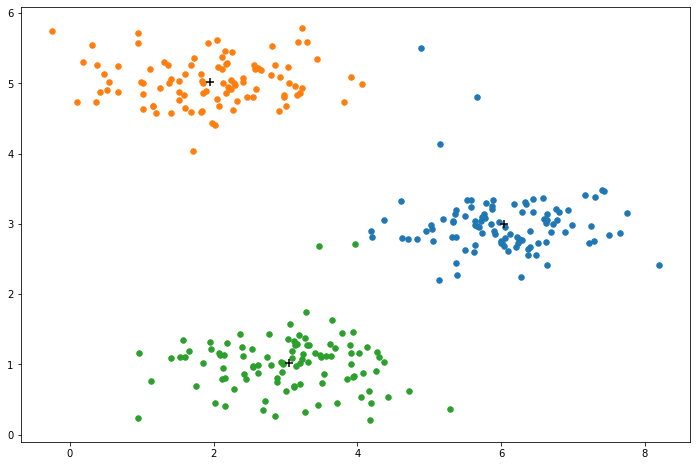

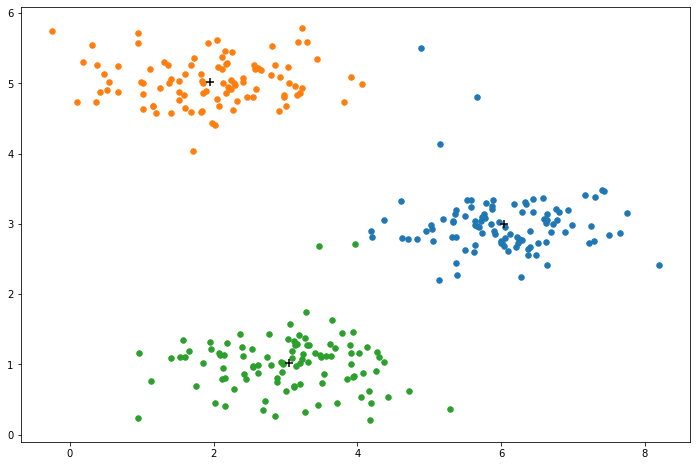

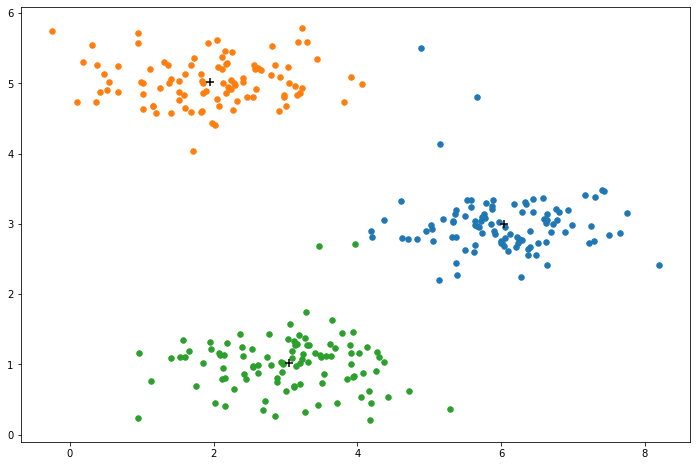

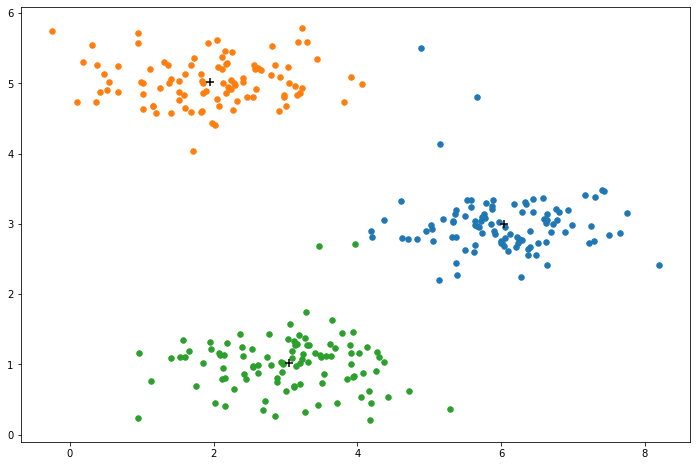

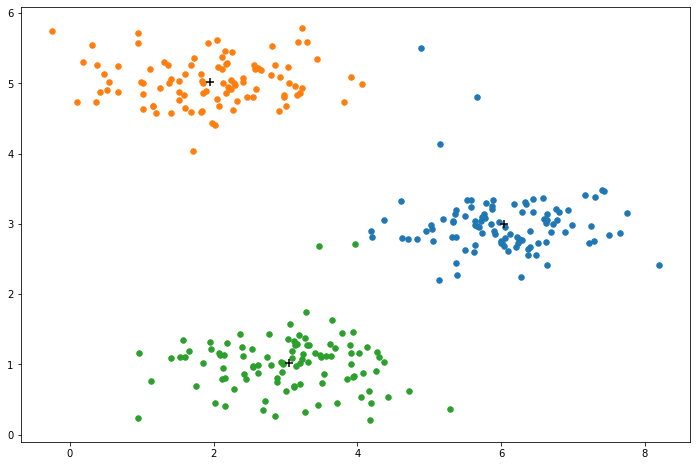

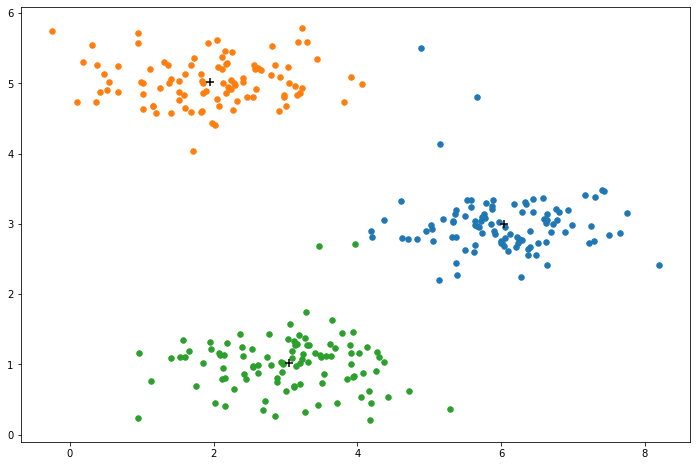

In [11]:
X = data['X']
iters = 50
k = 3
Centroids = kMeansInitCentroids(X, k)
print(Centroids)

for i in range(iters):
    # Cluster assignment
    labels = findClosestCentroids(X, Centroids)
    # after get the labels, we already know where the data points are allocated
    fig, ax = plt.subplots(figsize=(12, 8))
    for j in range(k):
        ax.scatter(X[np.where(labels == j)][:,0],X[np.where(labels == j)][:,1],s=30)
    ax.scatter(Centroids[:,0],Centroids[:,1],s=80,marker='+',c='k')
    plt.show()
    # Modify Centroids
    Centroids = computeCentroids(X, labels, k)
    time.sleep(1)

emmm...看起来不一样了，but,K-means algorithm 就是这样

## 接下来使用K-means完成图片压缩(Image compression)

In [12]:
# 读取图片
data = loadmat('./data/bird_small.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [13]:
data['A'].shape      # 可以看到图片是 3 * 128 * 128格式

(128, 128, 3)

In [14]:
data['A']

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

显示一下图片

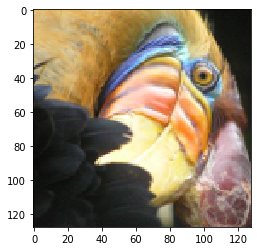

In [15]:
# img = img['A'] / 2 + 0.5     # unnormalize
img = data['A']
img.astype(np.uint8)       # 这里是需要注意的，不然显示不出来
plt.imshow(img)

In [16]:
# 转换矩阵的格式 (128, 128, 3) ---> (128*128, 3)
img = img.reshape(128*128,3)
img.shape

(16384, 3)

In [17]:
img[[0,1,2,3,4]]

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       [223, 185, 105],
       [225, 179, 103]], dtype=uint8)

接下来利用之前实现的K-means算法完成图片压缩

In [18]:
iters = 100
X = img
k = 16
Centroids = kMeansInitCentroids(X, 16)

for i in range(iters):
    labels = findClosestCentroids(X, Centroids)
    
    Centroids = computeCentroids(X, labels, k)
Centroids.shape, labels.shape

((16, 3), (16384,))

In [19]:
Centroids

array([[ 21.73661134,  23.53899154,  20.94393987],
       [150.20353982, 127.69358407, 113.75      ],
       [111.48060942,  79.46121884,  48.34626039],
       [162.33783784, 117.48986486,  51.49099099],
       [ 42.93893591,  42.81076179,  40.54050786],
       [233.86163522, 145.78616352,  64.51362683],
       [ 70.60454545,  66.97045455,  68.59886364],
       [211.0677686 , 190.32561983, 187.80991736],
       [ 98.91481481, 117.00740741, 165.2962963 ],
       [192.15277778, 153.11851852,  85.05277778],
       [145.25099602, 183.87250996, 221.29083665],
       [221.21107872, 182.61282799, 115.86413994],
       [117.80451128,  99.58270677,  90.18922306],
       [178.82366864, 160.50295858, 142.81183432],
       [245.63746224, 218.86002014, 160.61127895],
       [249.14607755, 241.14066727, 208.24256087]])

In [20]:
compressedImg = np.zeros((128,128,3))
compressedImg.shape

(128, 128, 3)

In [21]:
for i in range(128*128):
    row = int(i / 128)
    column = int(i % 128)
    # print(row, column, labels[i])
    compressedImg[row:row+1,column:column+1,:] = Centroids[labels[i],:]

绘图显示压缩后的图片

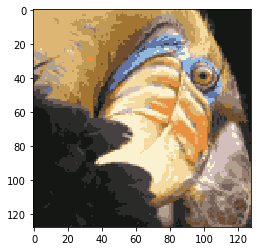

In [22]:
compressedImg = compressedImg.astype(np.uint8)
plt.imshow(compressedImg)

对比一下两张图

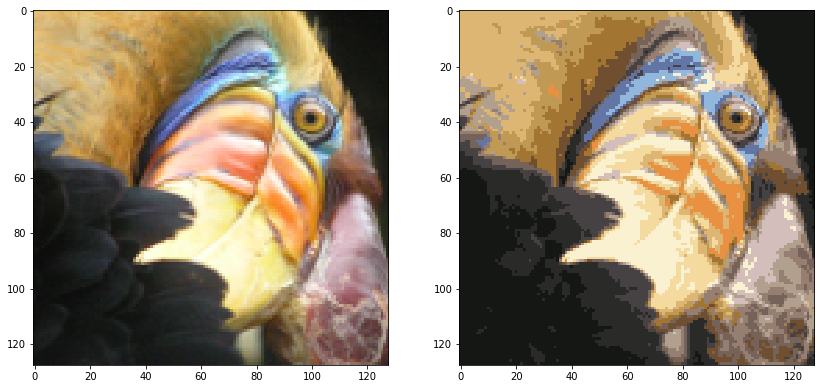

In [28]:
fig, ax = plt.subplots(1,2,figsize=(14,7))
ax[0].imshow(img.reshape(128,128,3).astype(np.uint8))
ax[1].imshow(compressedImg)
plt.show()

## 使用sklearn中的Kmeans实现

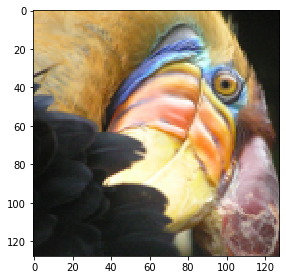

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import KMeans
from skimage import io

pic = io.imread('./data/bird_small.png') / 255
io.imshow(pic)
plt.show()


In [5]:
data = pic.reshape(128*128, 3)
data.shape

(16384, 3)

In [8]:
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [9]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=100, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
Centroids = model.cluster_centers_
print(Centroids.shape)
C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [16]:
Centroids[C].shape

(16384, 3)

In [17]:
compressedImage = Centroids[C].reshape((128,128,3))

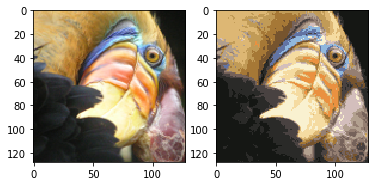

In [19]:
fig ,ax = plt.subplots(1,2)
ax[0].imshow(pic)
ax[1].imshow(compressedImage)
plt.show()

# 2.Principal Component Analysis

## Visualize Example Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat('./data/ex7data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [2]:
data = data['X']
data.shape

(50, 2)

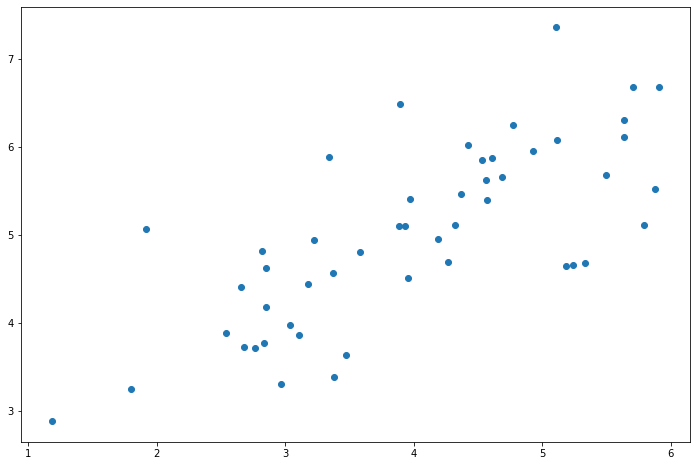

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data[:,0],data[:,1])
plt.show()

## Implementing PCA

In [65]:
a = np.array([[1,2],[3,4]])
b = np.array([[1],[1]])
a @ b

array([[3],
       [7]])

In [4]:
def normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def cov_matrix(X):
    return (X.T @ X) / X.shape[0]

def pca(X):
    # 整体数据的平均值还是每个特征对应的平均值?
    X_norm = normalize(X)   # (50, 2)
    
    sigma = cov_matrix(X_norm)
    
    U, S, V = np.linalg.svd(sigma)
    return U, S, V

In [5]:
U, S, V = pca(data)
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [6]:
def project_data(X, U, k):
    U_reduce = U[:, :k]
    
    return X @ U_reduce

In [8]:
# 之后应该使用规范化后的data,之前总是出错的原因就是因为这个
X_norm = normalize(data)
Z = project_data(X_norm, U, 1)
Z

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789],
       [-0.6316777 ],
       [-0.55280135],
       [-0.0896816 ],
       [-0.5258541 ],
       [ 1.56415455],
       [-1.91610366],
       [-0.88679735],
       [ 0.95607375],
       [-2.32995679],
       [-0.47793862],
       [-2.21747195],
       [ 0.38900633],
       [-1.78482346],
       [ 0.05175486],
       [ 1.66512392],
       [ 0.50813572],
       [-1.23711018],
       [-1.17198677],
       [ 0.84221686],
       [-0.00693174],
       [-0.22794195],
       [-1.51309518],
       [ 1.33874082],
       [-0.5925244 ],
       [ 0.67907605],
       [-1.35298   ],
       [ 1.68749495],
       [-1.39235931],
       [ 2.55992598],
       [-0.27850702],
       [-0.97677692],
       [ 0.88820006],
       [ 1.29666127],
       [-0.98966774],
       [ 1.81272352],
       [-0

In [9]:
def recover_data(Z, U, k):
    U_reduce = U[:, :k]
    return np.dot(Z, U_reduce.T)

In [10]:
X_recovered = recover_data(Z, U, 1)
X_recovered

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802],
       [ 0.44666359,  0.44666359],
       [ 0.39088959,  0.39088959],
       [ 0.06341447,  0.06341447],
       [ 0.371835  ,  0.371835  ],
       [-1.10602429, -1.10602429],
       [ 1.35488989,  1.35488989],
       [ 0.62706042,  0.62706042],
       [-0.67604623, -0.67604623],
       [ 1.64752825,  1.64752825],
       [ 0.33795364,  0.33795364],
       [ 1.56798945,  1.56798945],
       [-0.27506901, -0.27506901],
       [ 1.26206077,  1.26206077],
       [-0.03659622, -0.03659622],
       [-1.17742041, -1.17742041],
       [-0.35930621, -0.35930621],
       [ 0.874769  ,  0.874769  ],
       [ 0.82871979,  0.82871979],
       [-0.59553725,

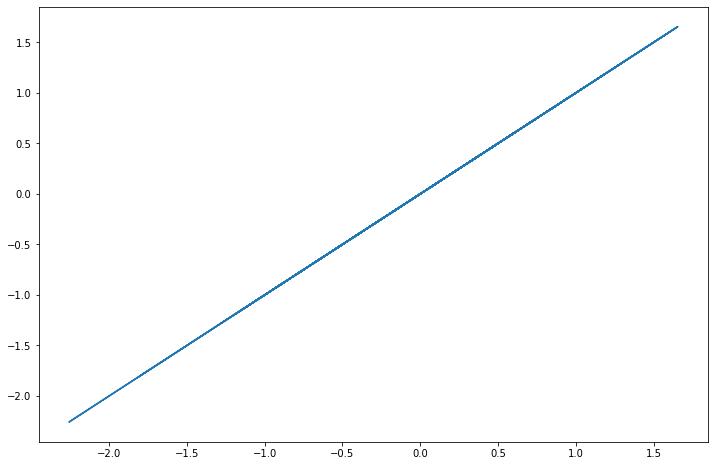

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X_recovered[:, 0],X_recovered[:, 1])
plt.show()

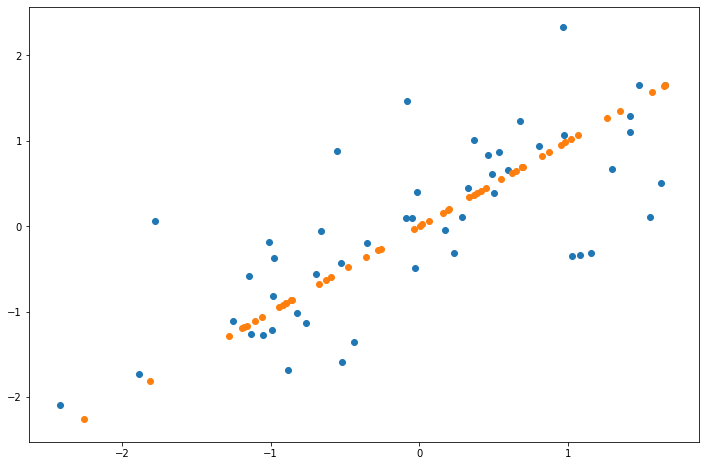

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_norm[:, 0],X_norm[:, 1])
ax.scatter(X_recovered[:, 0],X_recovered[:, 1])
plt.show()

~貌似有些问题，目前还不清楚哪里出错了~,出错是因为前后使用的数据集不一致(均应使用规范化后的)

## Face Image Dataset

In [15]:
mat = loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [16]:
data = mat['X']
data.shape

(5000, 1024)

In [39]:
# 将图片顺时针旋转90度, 为啥这样做，我也不清楚
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

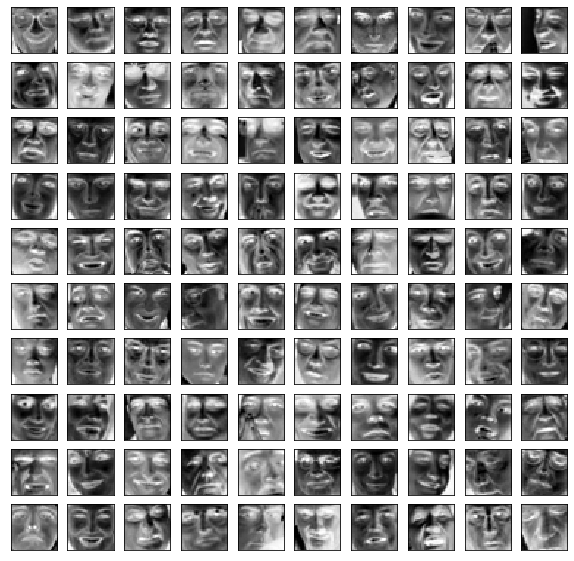

In [32]:
import matplotlib
fig ,ax = plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(10,10))
for i in range(100):
    r = int(i / 10)
    c = i % 10
    ax[r, c].imshow(X[i,:].reshape(32, 32),cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.show()  # 放在循环外侧，否则会出bug，自己被这里坑了

In [40]:
X_norm = normalize(X)
X_norm.shape

(5000, 1024)

In [41]:
U, S, V = pca(X)
U.shape

(1024, 1024)

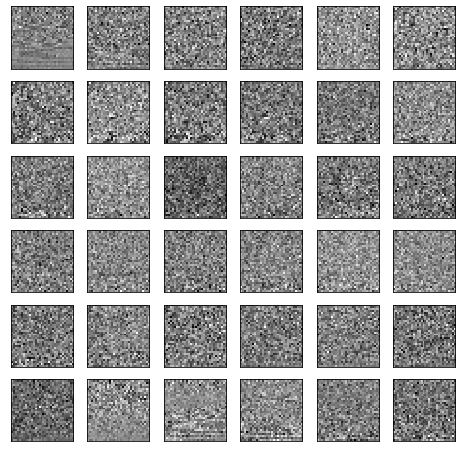

In [43]:
fig ,ax = plt.subplots(nrows=6,ncols=6,sharey=True,sharex=True,figsize=(8,8))
for i in range(36):
    r = int(i / 6)
    c = i % 6
    ax[r, c].imshow(U[i,:].reshape(32, 32),cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.show()  

In [44]:
X_projected = project_data(X_norm, U, 100)
X_projected.shape

(5000, 100)

In [45]:
X_recovered = recover_data(X_projected, U, 100)
X_recovered.shape

(5000, 1024)

In [46]:
def plot_n_images(data, n):
    pic_size = int(np.sqrt(data.shape[1]))
    grid_size = int(np.sqrt(n))
    fig ,ax = plt.subplots(nrows=grid_size,ncols=grid_size,sharey=True,sharex=True,figsize=(8,8))
    for i in range(n):
        r = int(i / grid_size)
        c = i % grid_size
        ax[r, c].imshow(data[i,:].reshape(pic_size, pic_size),cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()  

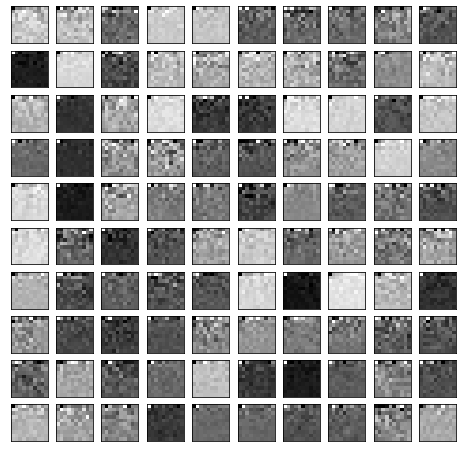

In [47]:
plot_n_images(X_projected, 100)

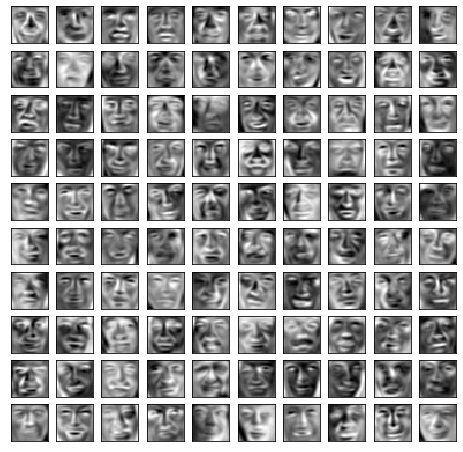

In [48]:
plot_n_images(X_recovered, 100)

## 使用sklearn

In [49]:
from sklearn.decomposition import PCA
model = PCA(n_components=100)

In [51]:
Z = model.fit_transform(X)
Z.shape

(5000, 100)

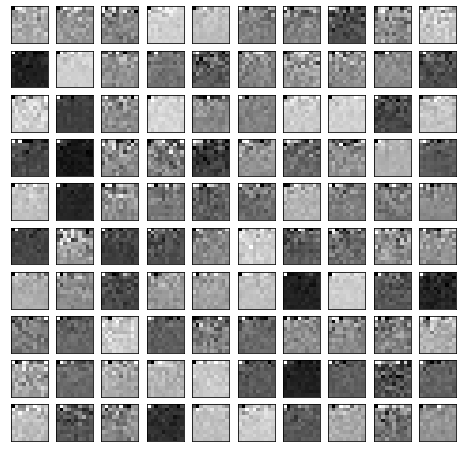

In [54]:
plot_n_images(Z, 100)

In [55]:
X_recovered = model.inverse_transform(Z)
X_recovered.shape

(5000, 1024)

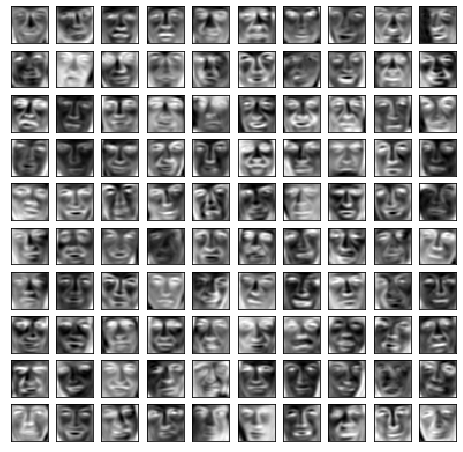

In [56]:
plot_n_images(X_recovered, 100)